In [98]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colors
import mplhep as hep
import numpy as np
import pandas as pd
from coffea.util import load
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)
import vector
vector.register_awkward()
import hist
import numba

In [7]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/TTbar_MC_Run3_v3/"

In [8]:
input_folder_must = "/pnfs/psi.ch/cms/trivcat/store/user/dvalsecc/clustering/ttbar_Run3_MC"
input_folder_deep = "/pnfs/psi.ch/cms/trivcat/store/user/dvalsecc/clustering/ttbar_Run3_MC"

In [9]:
dfM = uproot.lazy([f"{input_folder_must}/ttbar_Run3_Mustache.root:recosimdumper/caloTree",], num_workers=4)
dfD = uproot.lazy([f"{input_folder_deep}/ttbar_Run3_DeepSC_algoA.root:recosimdumper/caloTree", ],num_workers=4)

In [11]:
seed_id_M = dfM.superCluster_seedRawId
seed_id_D = dfD.superCluster_seedRawId

In [12]:
dfM.eventId

<Array [54917, 54919, 54914, ... 32864, 32863] type='100000 * int64'>

In [14]:
dfD.eventId == dfM.eventId

<Array [True, True, True, ... False, False] type='100000 * bool'>

In [25]:
ak.ones_like(dfM.superCluster_seedRawId)*dfM.eventId

<Array [[54917, 54917, ... 32863, 32863]] type='100000 * var * int64'>

In [31]:
structureM = ak.ones_like(dfM.superCluster_seedRawId)
structureD = ak.ones_like(dfD.superCluster_seedRawId)
SC_M = {"eventId": ak.flatten(structureM*dfM.eventId),
        "lumiId": ak.flatten(structureM*dfM.lumiId), 
        "runId": ak.flatten(structureM*dfM.runId), 
       "seed_id": ak.flatten(dfM.superCluster_seedRawId) }
SC_D = {"eventId": ak.flatten(structureD*dfD.eventId),
        "lumiId": ak.flatten(structureD*dfD.lumiId), 
        "runId":  ak.flatten(structureD*dfD.runId), 
       "seed_id": ak.flatten(dfD.superCluster_seedRawId) }

In [46]:
sc_fields = [f for f in dfM.fields if "superCluster" in f]

In [53]:
sc_fields = ["superCluster_rawEnergy","superCluster_energy",
            "superCluster_eta","superCluster_phi", "superCluster_etaWidth", "superCluster_phiWidth",
            "superCluster_nPFClusters","superCluster_ieta","superCluster_iphi","superCluster_iz",
            "superCluster_seedIndex",
            "superCluster_r9", "superCluster_swissCross"]

In [54]:
SC_M.update({k:ak.flatten(dfM[k]) for k in sc_fields})
SC_D.update({k:ak.flatten(dfD[k]) for k in sc_fields})

In [66]:
pM = pd.DataFrame(SC_M)
pD = pd.DataFrame(SC_D)

In [67]:
df_join = pM.merge(pD, on=["runId","eventId","lumiId","seed_id"], suffixes=["_M", "_D"],indicator=True, how="outer", sort=False)

In [68]:
df_join

eventId  lumiId  runId    seed_id  superCluster_seedRawId_M  \
0          54917     133      1  838864716               838864716.0   
1          54917     133      1  838886189               838886189.0   
2          54917     133      1  838947923               838947923.0   
3          54917     133      1  838949457               838949457.0   
4          54917     133      1  838865734               838865734.0   
...          ...     ...    ...        ...                       ...   
1993577    32855      79      1  872436385                       NaN   
1993578    32858      79      1  838882024                       NaN   
1993579    32858      79      1  872421796                       NaN   
1993580    32860      79      1  872435875                       NaN   
1993581    32857      79      1  838945540                       NaN   

         superCluster_rawEnergy_M  superCluster_energy_M  superCluster_eta_M  \
0                       23.077635              24.729767           -0.109326   
1                       20.998091              21.579462           -0.849145   
2                       31.813459              33.318939            0.730887   
3                       15.694868              17.318903            0.777227   
4                        5.778908               6.636276           -0.156026   
...                           ...                    ...                 ...   
1993577                       NaN                    NaN                 NaN   
1993578                       NaN                    NaN                 NaN   
1993579                       NaN                    NaN                 NaN   
1993580                       NaN                    NaN                 NaN   
1993581                       NaN                    NaN                 NaN   

         superCluster_phi_M  superCluster_etaWidth_M  ...  \
0                 -0.685975                 0.008476  ...   
1                 -1.223468                 0.012021  ...   
2                  1.284484                 0.012460  ...   
3                  1.200890                 0.010724  ...   
4                 -0.756019                 0.003791  ...   
...                     ...                      ...  ...   
1993577                 NaN                      NaN  ...   
1993578                 NaN                      NaN  ...   
1993579                 NaN                      NaN  ...   
1993580                 NaN                      NaN  ...   
1993581                 NaN                      NaN  ...   

         superCluster_etaWidth_D  superCluster_phiWidth_D  \
0                       0.008502                 0.004715   
1                       0.012021                 0.016189   
2                       0.037110                 0.053813   
3                            NaN                      NaN   
4                       0.003902                 0.004925   
...                          ...                      ...   
1993577                 0.013496                 0.085348   
1993578                 0.017130                 0.183346   
1993579                 0.038513                 0.032921   
1993580                 0.009628                 0.099736   
1993581                 0.017392                 0.222049   

         superCluster_nPFClusters_D  superCluster_ieta_D  superCluster_iphi_D  \
0                               1.0                 -6.0                332.0   
1                               1.0                -49.0                301.0   
2                               9.0                 42.0                 83.0   
3                               NaN                  NaN                  NaN   
4                               1.0                 -9.0                326.0   
...                             ...                  ...                  ...   
1993577                         2.0                 37.0                 34.0   
1993578                         5.0                -41.0             

In [69]:
df_join.to_parquet(input_folder_must+"/joined_dataset.parquet.gzip", compression="gzip")

In [75]:
np.sum(df_join._merge == "both")

1376776

In [76]:
np.sum(df_join._merge == "left_only")

443951

In [77]:
np.sum(df_join._merge == "right_only")

172855

In [78]:
merged = df_join[df_join._merge == "both"]

B: 1374156.0
A. 1374115.0


PermissionError: [Errno 13] Permission denied: '/eos/user/d/dvalsecc'

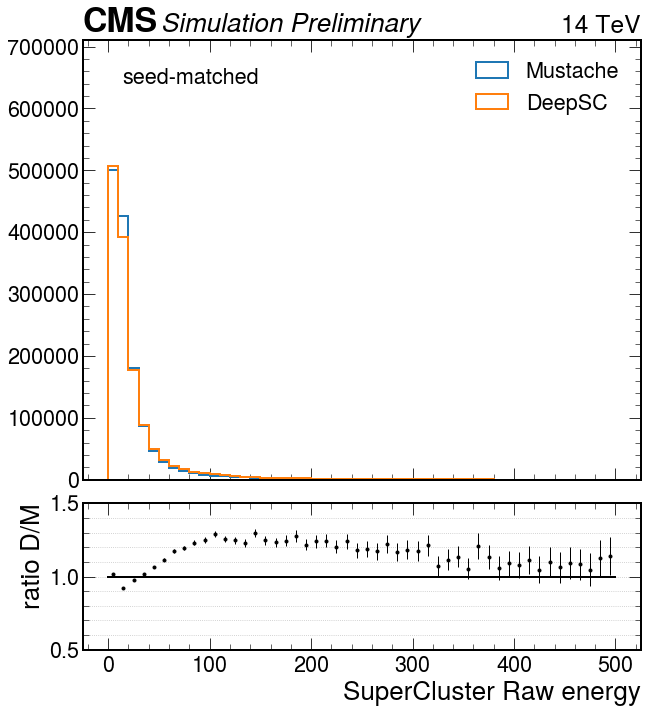

In [138]:
plot_comparison(merged.superCluster_rawEnergy_M,
                merged.superCluster_rawEnergy_D,
                var=f"merged_SC_rawEnergy", label="SuperCluster Raw energy",
                output_folder=output_folder,
                text="seed-matched", texty=0.9,
                bins=50, xrange=(0,500), ratio_lim=(0.5,1.5))

B: 1376762.0
A. 1376760.0


/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


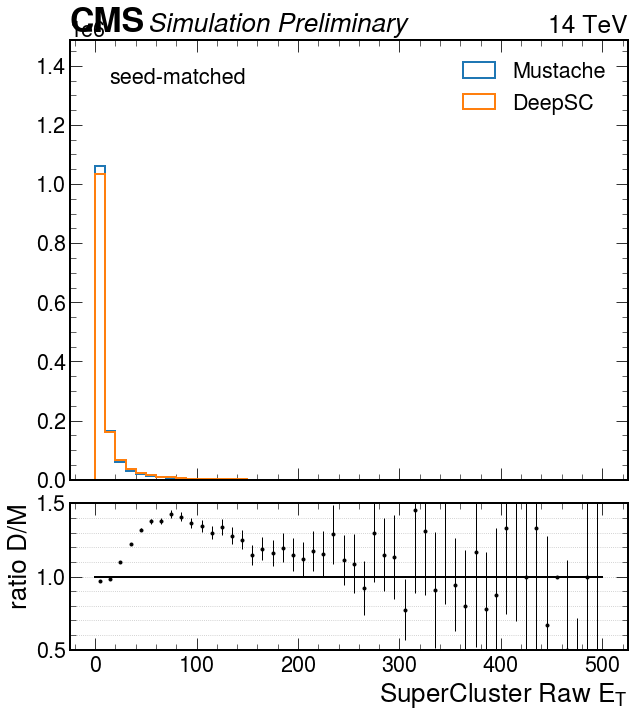

In [140]:
plot_comparison(merged.superCluster_rawEnergy_M/np.cosh(merged.superCluster_eta_M),
                merged.superCluster_rawEnergy_D/np.cosh(merged.superCluster_eta_D),
                var=f"merged_SC_rawEnergy_transverse", label="SuperCluster Raw $E_T$",
                output_folder=output_folder,
                text="seed-matched", texty=0.9,
                bins=50, xrange=(0,500), ratio_lim=(0.5,1.5))

B: 1376776.0
A. 1376776.0


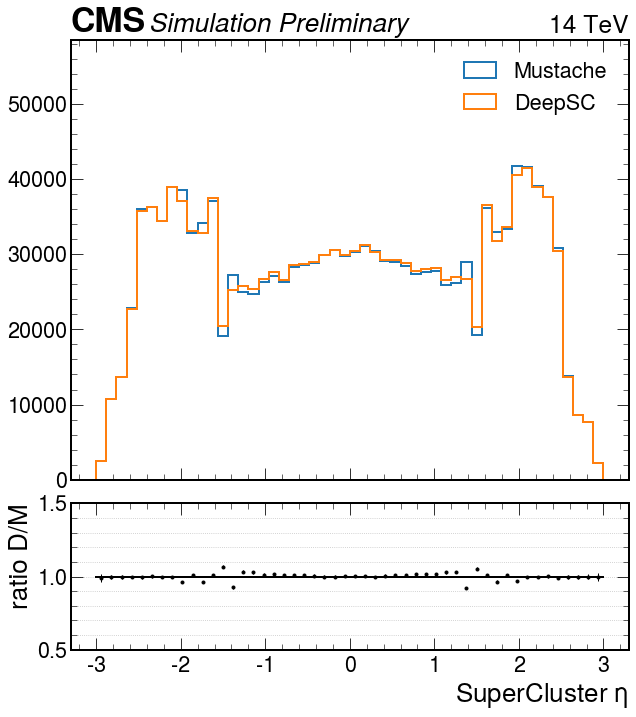

In [83]:
plot_comparison(merged.superCluster_eta_M,
                merged.superCluster_eta_D,
                var=f"merged_SC_eta", label="SuperCluster $\eta$",
                output_folder=output_folder,
                bins=50, xrange=(-3,3), ratio_lim=(0.5,1.5))

B: 1376776.0
A. 1376744.0


/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:93: RuntimeWarning: divide by zero encountered in divide
  A/B,


PermissionError: [Errno 13] Permission denied: '/eos/user/d/dvalsecc'

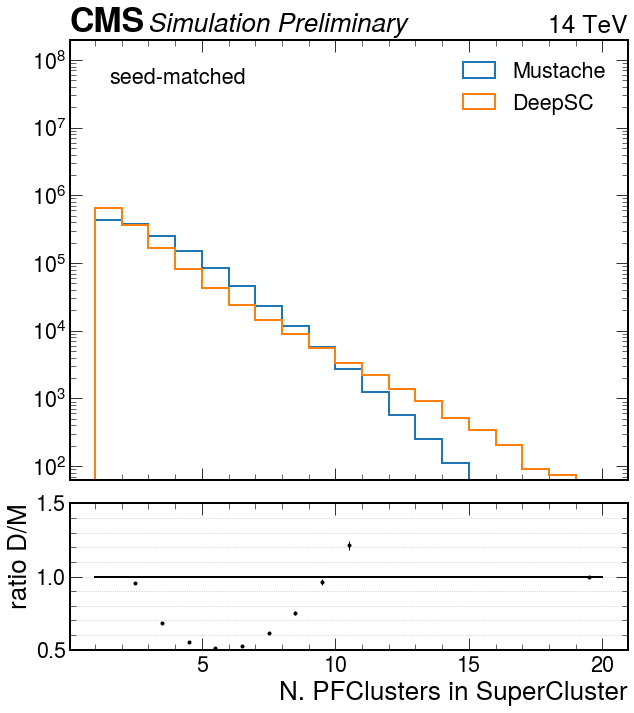

In [137]:
plot_comparison(merged.superCluster_nPFClusters_M,
                merged.superCluster_nPFClusters_D,
                var=f"merged_SC_nPFclusters", label="N. PFClusters in SuperCluster",
                output_folder=output_folder,
                text="seed-matched", texty=0.9, ylog=True,
                bins=19, xrange=(1,20), ratio_lim=(0.5,1.5))

B: 1141973.0
A. 1141973.0


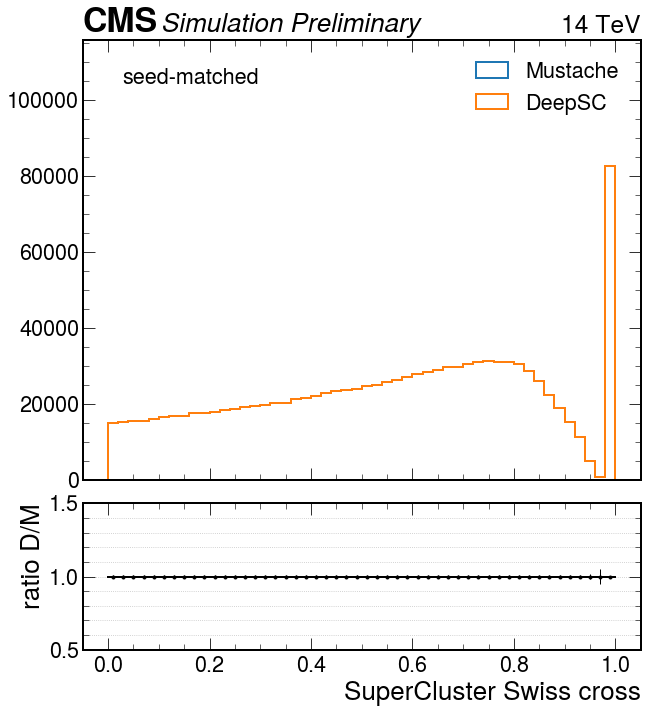

In [90]:
plot_comparison(merged.superCluster_swissCross_M,
                merged.superCluster_swissCross_D,
                var=f"merged_SC_swisscross", label="SuperCluster Swiss cross",
                output_folder=output_folder,
                text="seed-matched", texty=0.9,
                bins=50, xrange=(0,1), ratio_lim=(0.5,1.5))

B: 5819.0
A. 5819.0


/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_29527/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


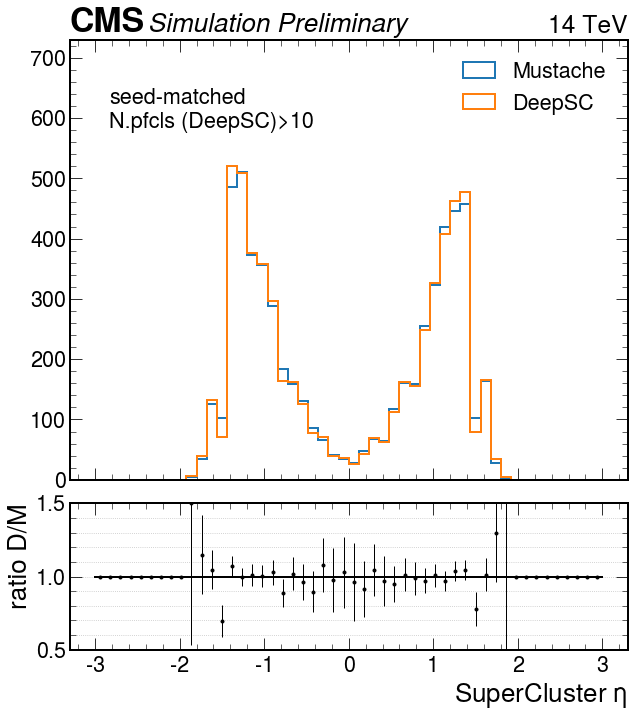

In [96]:
plot_comparison(merged.superCluster_eta_M[merged.superCluster_nPFClusters_D>10],
                merged.superCluster_eta_D[merged.superCluster_nPFClusters_D>10],
                var=f"merged_SC_eta_10pfcls", label="SuperCluster $\eta$",
                output_folder=output_folder,
                text="seed-matched\nN.pfcls (DeepSC)>10", texty=0.8,
                bins=50, xrange=(-3,3), ratio_lim=(0.5,1.5))

/tmp/ipykernel_29527/366672931.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

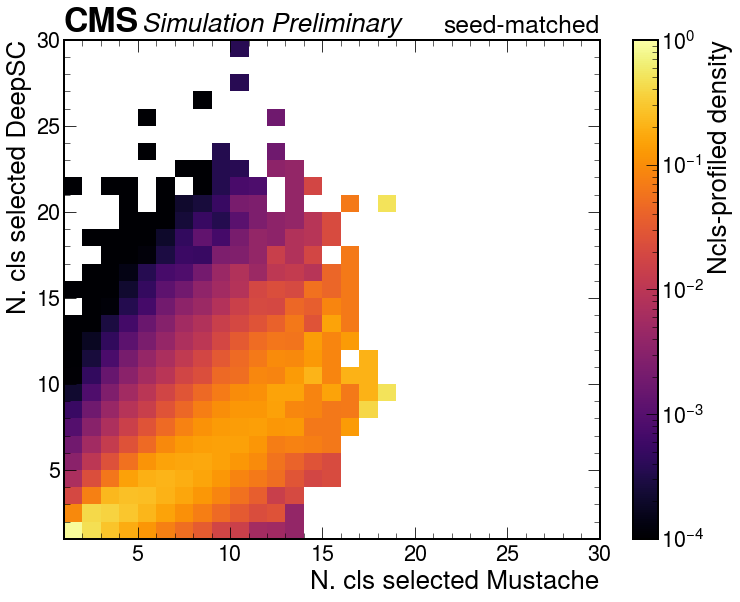

In [126]:
xbins = list(range(1, 31))
ybins =  list(range(1, 31))

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=72)

A,xedges,yedges  = np.histogram2d(merged.superCluster_nPFClusters_M, 
                                  merged.superCluster_nPFClusters_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-4), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("N. cls selected Mustache")

hep.cms.label(llabel="Simulation Preliminary", rlabel="seed-matched", loc=0, ax=ax)


Text(0.1, 0.05, 'Inclusive')

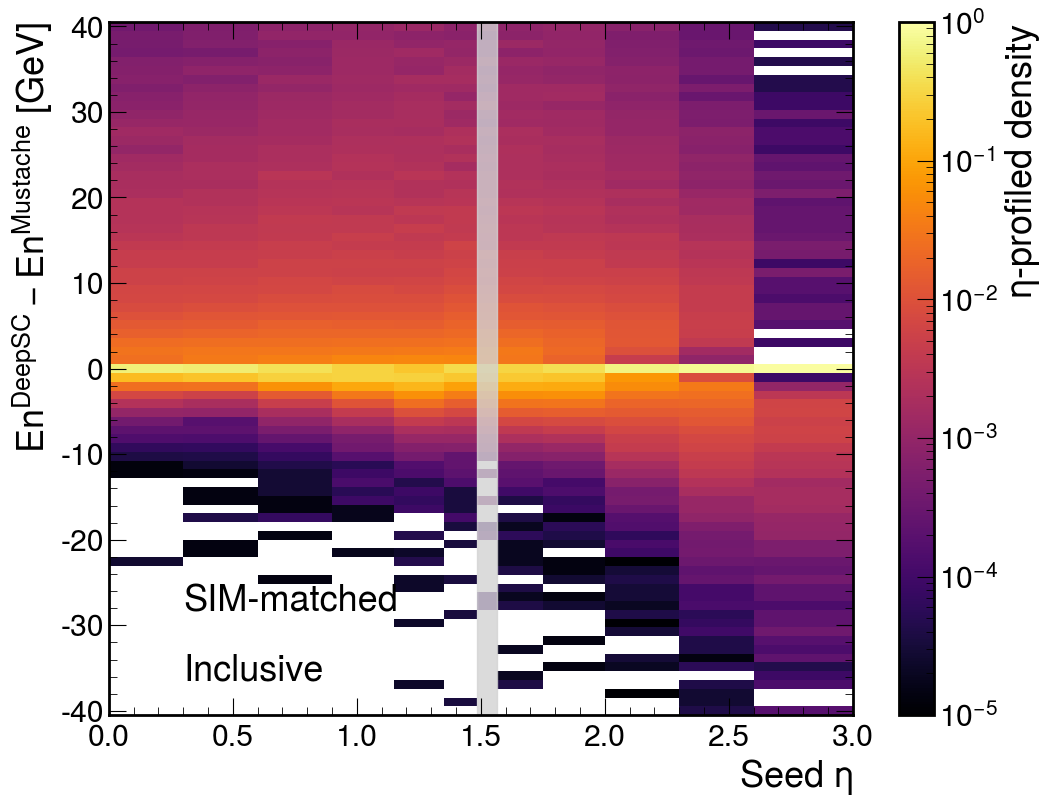

In [130]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(merged.superCluster_eta_D, 
                                  merged.superCluster_rawEnergy_D - merged.superCluster_rawEnergy_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)



/tmp/ipykernel_29527/3937483189.py:11: RuntimeWarning: invalid value encountered in divide
  a = A/s


Text(0.5, 0.05, 'Inclusive')

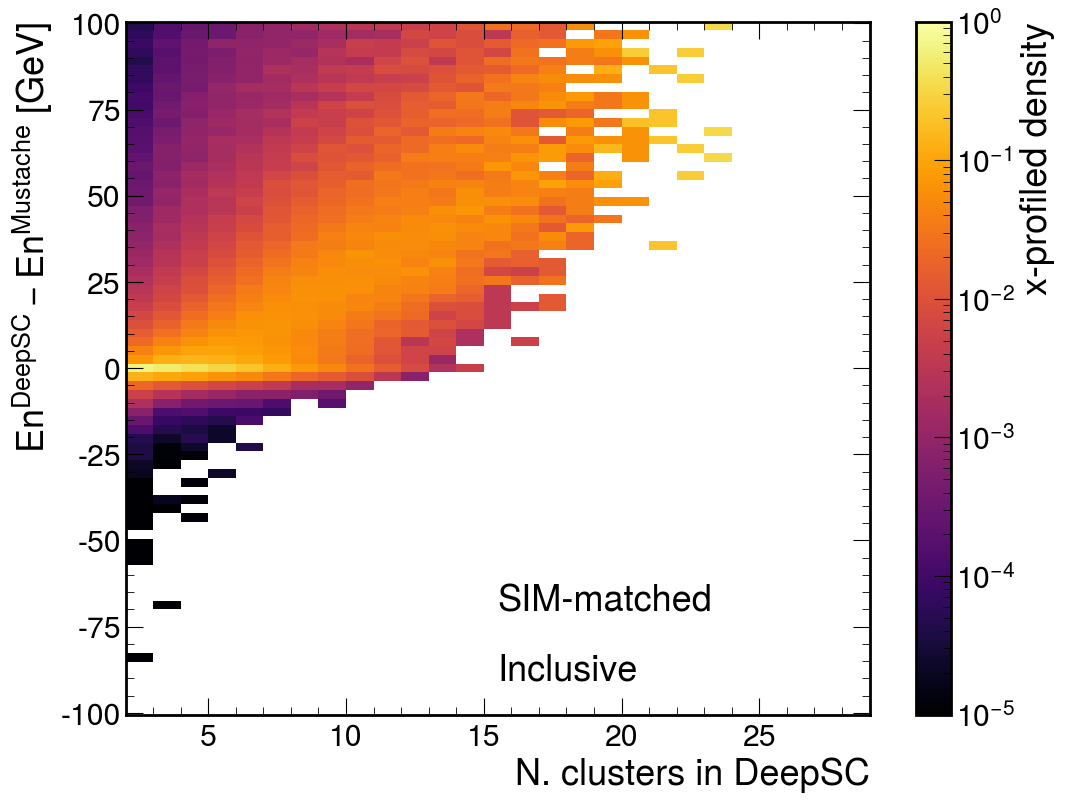

In [134]:
etas =  np.arange(2, 30)
xbins = np.linspace(-100.5,100.5,80)

df = df_join
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(merged.superCluster_nPFClusters_D, 
                                  merged.superCluster_rawEnergy_D - merged.superCluster_rawEnergy_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in DeepSC")
ax.text(0.5, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.5, 0.05, "Inclusive", transform=ax.transAxes)


/tmp/ipykernel_29527/3744935031.py:11: RuntimeWarning: invalid value encountered in divide
  a = A/s


Text(0.5, 0.05, 'Inclusive')

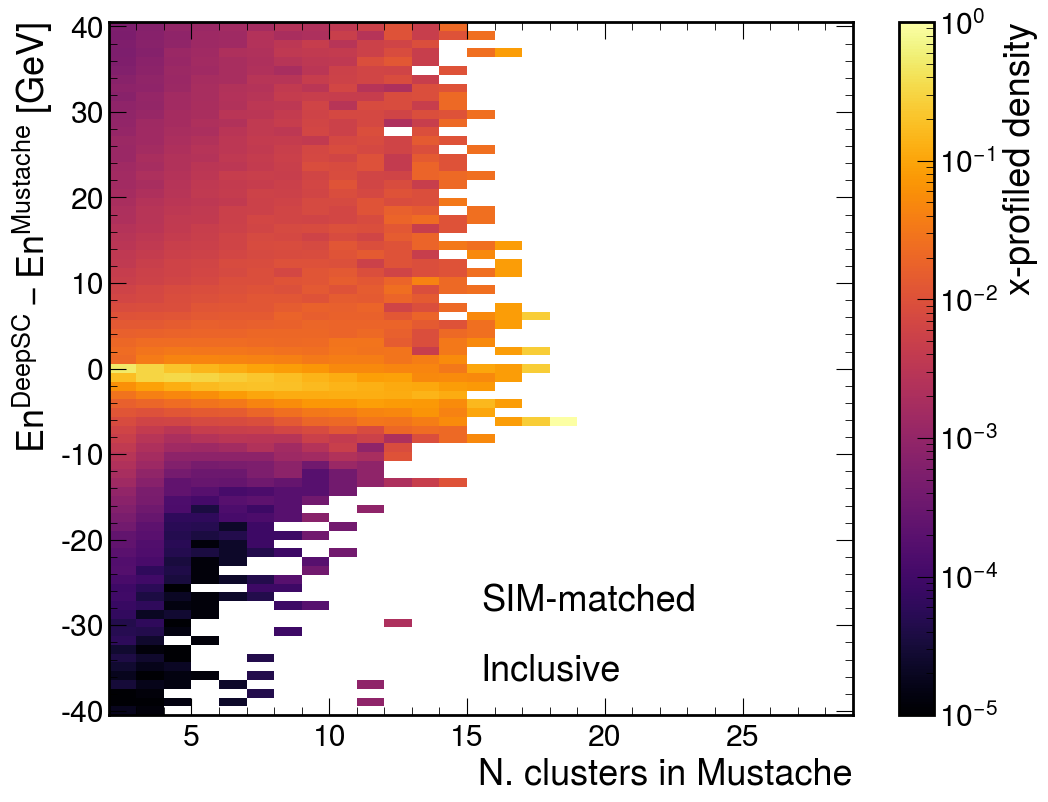

In [132]:
etas =  np.arange(2, 30)
xbins = np.linspace(-40.5,40.5,80)

df = df_join
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(merged.superCluster_nPFClusters_M, 
                                  merged.superCluster_rawEnergy_D - merged.superCluster_rawEnergy_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in Mustache")
ax.text(0.5, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.5, 0.05, "Inclusive", transform=ax.transAxes)


# General analysis

In [82]:
def plot_hist(dfA, var, label, bins, xrange, output_folder, 
                    ylog=False, wA=None, flatten=False, density=False,
                    legend="DeepSC", text=None, llabel="Simulation Preliminary",rlabel="14 TeV",
                   texty=.75, cmslabel="TTbar Run3"):
    
    fig = plt.figure(figsize=(10,9), dpi=150)
    ax = plt.gca()
    
    if flatten:
        dfA = ak.flatten(dfA)
    
    A, binX, _ = ax.hist(dfA, bins=bins, range=xrange, weights=wA,
                         label=legend, histtype="step", linewidth=2, density=density)
    
    print("A.", np.sum(A))

    ax.legend()
    ax.set_xlabel(label)
    
    if text!=None:
        ax.text(0.07, texty, text, transform=ax.transAxes, fontsize="small")
        
    #hep.cms.label(llabel=llabel, rlabel=rlabel, loc=0, ax=ax)
    
   
    mmax = max(A)
    if ylog:
        ax.set_ylim(max(min(A), 1), mmax*200)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, mmax*1.4)
         
    if output_folder!=None:
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + f"/{var}_comparison.png")
        fig.savefig(output_folder + f"/{var}_comparison.pdf")
        fig.savefig(output_folder + f"/{var}_comparison.svg")
        


def plot_comparison(dfB, dfA, var, label, bins, xrange, output_folder, 
                    ylog=False, wA=None, wB=None, flatten=False,density=False,
                    legendB="Mustache", legendA="DeepSC", text=None, ratio_lim=(0.8,1.2),
                   texty=.75, rlabel="14 TeV",llabel="Simulation Preliminary"):
    
    fig = plt.figure(figsize=(10,11), dpi=72)
    gs = fig.add_gridspec(2,1, height_ratios=[0.75,0.25])
    plt.subplots_adjust(hspace=0.08)
    axs = gs.subplots(sharex=True)
    
    ax =  axs[0]
    axr =  axs[1]
    
    if flatten:
        dfA = ak.flatten(dfA)
        dfB = ak.flatten(dfB)
    
    B, binX, _ = ax.hist(dfB, bins=bins, range=xrange,  weights=wB,
                         label=legendB, histtype="step", linewidth=2, density=density)
    A, binX, _ = ax.hist(dfA, bins=bins, range=xrange, weights=wA,
                         label=legendA, histtype="step", linewidth=2, density=density)
    
    print("B:", np.sum(B))
    print("A.", np.sum(A))
    
    if density:
        errA,_ = np.histogram(dfA, bins=bins, range=xrange, weights=wA)
        errB,_ = np.histogram(dfB, bins=bins, range=xrange, weights=wB)
    else:
        errA = np.sqrt(A)
        errB = np.sqrt(B)

    ax.legend()
    axr.set_xlabel(label)
    
    if text!=None:
        ax.text(0.07, texty, text, transform=ax.transAxes, fontsize="small")
        
    hep.cms.label(llabel=llabel, rlabel=rlabel, loc=0, ax=ax)
    
   
    mmax = max([max(A), max(B)])
    if ylog:
        ax.set_ylim(max([min(A), min(B),1e-3]), mmax*300)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, mmax*1.4)
         

    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    ratio= np.where( (A>0)&(B>0),
                     A/B,
                     1.) 
    
    centers = (np.roll(binX, -1) + binX)/2
 
    axr.errorbar(centers[:-1], ratio, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1, c="black")
    
    if ratio_lim =="auto":
        deltaMax = max([np.max(ratio), 1.1])
        deltaMin = min([np.min(ratio), 0.9])

        #print(deltaM)
        axr.set_ylim(max(0, deltaMin*0.9), deltaMax*1.1)
    else:
        axr.set_ylim(*ratio_lim)
    axr.set_ylabel("ratio D/M")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-1]], [1.,1.], linewidth=2, c="black")

    if output_folder!=None:
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + f"/{var}_comparison.png")
        fig.savefig(output_folder + f"/{var}_comparison.pdf")
        fig.savefig(output_folder + f"/{var}_comparison.svg")
        
        
def plot_comparison_H(Hb, Ha, var, output_folder, legendB="Mustache", legendA="DeepSC", 
                    ylog=False, density=False, ratio_lim=(0.9, 1.1)):
    
    fig = plt.figure(figsize=(10,11), dpi=72)
    gs = fig.add_gridspec(2,1, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    
    ax =  axs[0]
    axr =  axs[1]
    
    hep.histplot(Hb, label=legendB, density=density, ax=ax, linewidth=2)
    hep.histplot(Ha, label=legendA, density=density, ax=ax, linewidth=2)
        
    A = Ha.values()
    B = Hb.values()
    errA = np.sqrt(A)
    errB = np.sqrt(B)

    ax.legend()
    axr.set_xlabel(Ha.axes[0].label)
    hep.cms.label(llabel="Data", rlabel="Run2018C Zee skim", loc=0, ax=ax)
    mmax = max([max(A), max(B)])
    if ylog:
        ax.set_ylim(max([min(A), min(B),1e-3]), mmax*500)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, mmax*1.4)


    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    ratio= np.where( (A>0)&(B>0),
                     A/B,
                     1.) 
    
    if isinstance(Ha.axes[0], hist.axis.Integer):
        centers = Ha.axes[0].centers -1 
        edges = Ha.axes[0].edges -1
    else:
        centers = Ha.axes[0].centers
        edges = Ha.axes[0].edges
    
 
    axr.errorbar(centers, ratio, xerr=0, yerr=errR,
                fmt=".", linestyle='none', elinewidth=1, c="black")

    if ratio_lim =="auto":
        deltaMax = max([np.max(ratio), 1.1])
        deltaMin = min([np.min(ratio), 0.9])

        #print(deltaM)
        axr.set_ylim(max(0, deltaMin*0.9), deltaMax*1.1)
    else:
        axr.set_ylim(*ratio_lim)
    axr.set_ylabel("ratio")
    axr.grid(which="both",axis="y")
    axr.plot([edges[0], edges[-1]], [1.,1.], linewidth=2, c="black")

    if output_folder!=None:
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + f"/{var}_comparison.png")
        fig.savefig(output_folder + f"/{var}_comparison.pdf")
        fig.savefig(output_folder + f"/{var}_comparison.svg")
    


### Available fields

In [36]:
[f for f in dfM.fields if "superCluster" in f]

['genParticle_superCluster_dR_genScore_MatchedIndex',
 'pfCluster_superClustersIndex',
 'patElectron_superClusterFbrem',
 'superCluster_seedRawId',
 'superCluster_rawEnergy',
 'superCluster_rawESEnergy',
 'superCluster_energy',
 'superCluster_eta',
 'superCluster_phi',
 'superCluster_etaWidth',
 'superCluster_phiWidth',
 'superCluster_R',
 'superCluster_nPFClusters',
 'superCluster_ieta',
 'superCluster_iphi',
 'superCluster_iz',
 'superCluster_nXtals',
 'superCluster_seedIndex',
 'superCluster_pfClustersIndex',
 'superCluster_psCluster_energy',
 'superCluster_psCluster_eta',
 'superCluster_psCluster_phi',
 'superCluster_e5x5',
 'superCluster_e2x2Ratio',
 'superCluster_e3x3Ratio',
 'superCluster_eMaxRatio',
 'superCluster_e2ndRatio',
 'superCluster_eTopRatio',
 'superCluster_eRightRatio',
 'superCluster_eBottomRatio',
 'superCluster_eLeftRatio',
 'superCluster_e2x5MaxRatio',
 'superCluster_e2x5TopRatio',
 'superCluster_e2x5RightRatio',
 'superCluster_e2x5BottomRatio',
 'superCluster_e2

## SuperCluster

## SC kinematics
Accumualted over all the SC

B: 1820727.0
A. 1549631.0


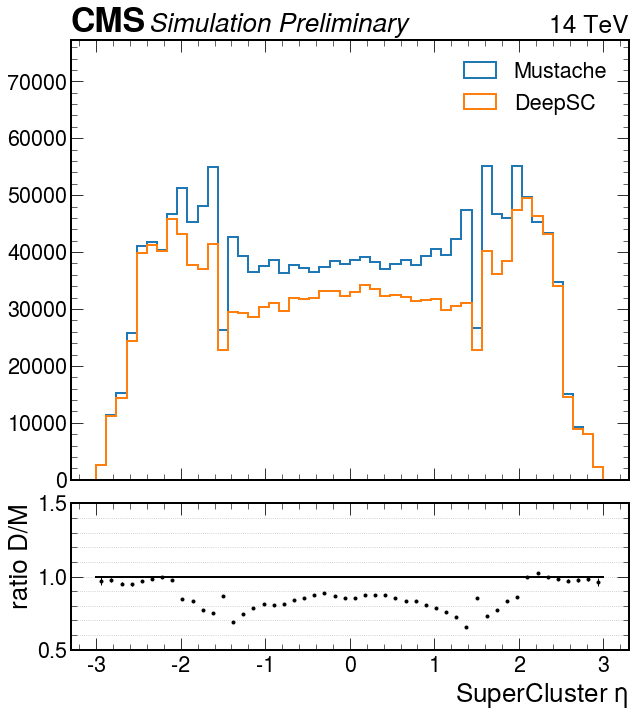

In [8]:
plot_comparison(ak.flatten(dfM.superCluster_eta), ak.flatten(dfD.superCluster_eta),
                var=f"SC_eta", label="SuperCluster $\eta$",
                output_folder=output_folder,
                bins=50, xrange=(-3,3), ratio_lim=(0.5,1.5))

B: 1819787.0
A. 1548698.0


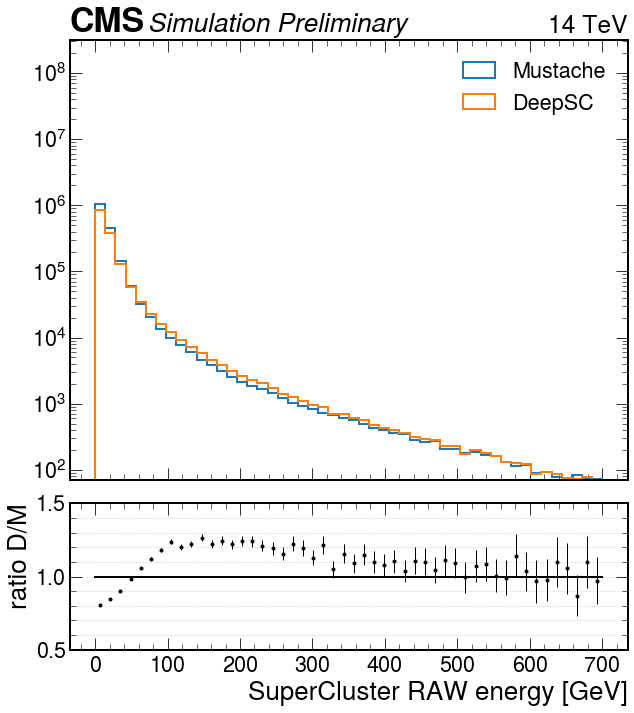

In [28]:
plot_comparison(ak.flatten(dfM.superCluster_rawEnergy), ak.flatten(dfD.superCluster_rawEnergy),
                var=f"SC_raw_energy", label="SuperCluster RAW energy [GeV]",
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,700), ratio_lim=(0.5,1.5))

In [1]:
plot_comparison(ak.flatten(dfM.superCluster_rawEnergy)/np.cosh(ak.flatten(dfM.superCluster_eta)),
                ak.flatten(dfD.superCluster_rawEnergy)/np.cosh(ak.flatten(dfD.superCluster_eta)),
                var=f"SC_raw_et", label="SuperCluster RAW transverse energy [GeV]",
                output_folder=output_folder, 
                bins=50, xrange=(0,500), ratio_lim=(0.5,1.7))

NameError: name 'plot_comparison' is not defined

B: 1819699.0
A. 1548593.0


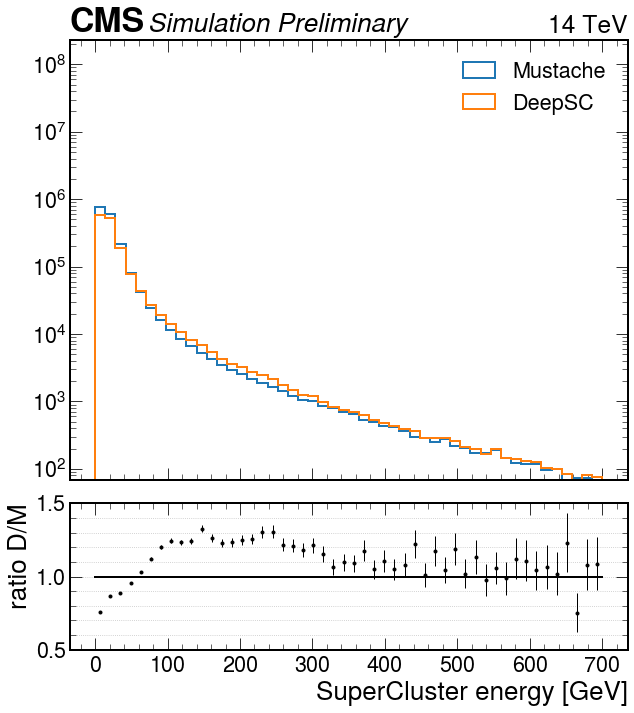

In [30]:
plot_comparison(ak.flatten(dfM.superCluster_energy), ak.flatten(dfD.superCluster_energy),
                var=f"SC_energy", label="SuperCluster energy [GeV]",
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,700), ratio_lim=(0.5,1.5))

B: 1820536.0
A. 1549409.0


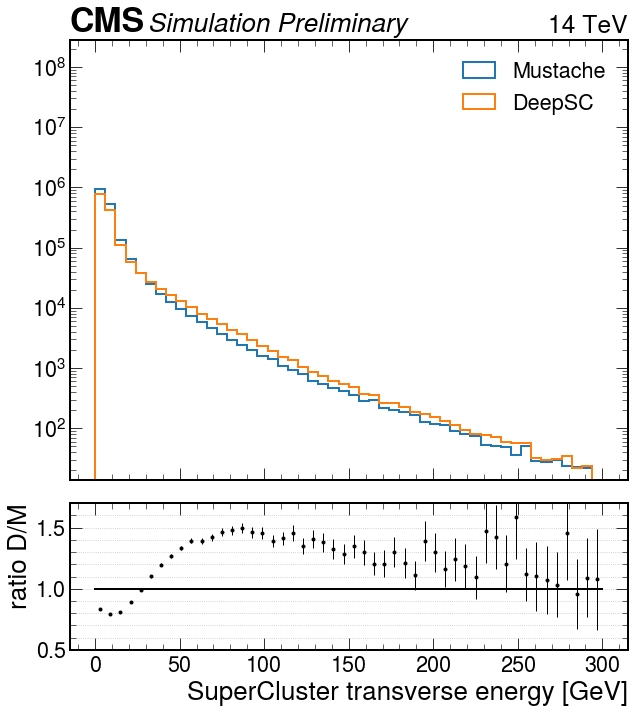

In [13]:
plot_comparison(ak.flatten(dfM.superCluster_energy)/np.cosh(ak.flatten(dfM.superCluster_eta)),
                ak.flatten(dfD.superCluster_energy)/np.cosh(ak.flatten(dfD.superCluster_eta)),
                var=f"SC_et", label="SuperCluster transverse energy [GeV]",
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,300), ratio_lim=(0.5,1.7))

## Number of SC

B: 99950.0
A. 100000.0


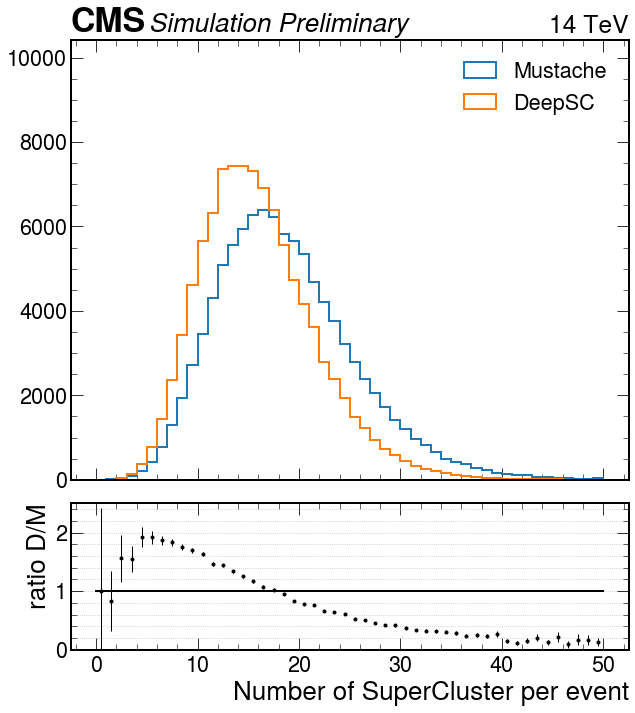

In [13]:
plot_comparison(ak.num(dfM.superCluster_energy,axis=1), ak.num(dfD.superCluster_energy,axis=1),
                var=f"nSC", label="Number of SuperCluster per event",
                output_folder=output_folder,
                bins=50, xrange=(0,50), ratio_lim=(0,2.5))

B: 1820727.0
A. 1549599.0


/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:93: RuntimeWarning: divide by zero encountered in divide
  A/B,


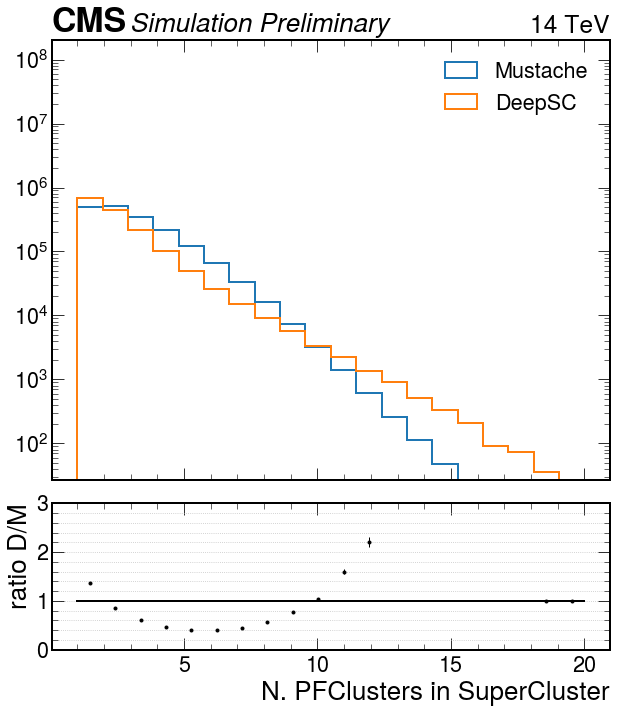

In [18]:
plot_comparison(ak.flatten(dfM.superCluster_nPFClusters,axis=1), 
                ak.flatten(dfD.superCluster_nPFClusters,axis=1),
                var=f"sc_nPFCls", label="N. PFClusters in SuperCluster",
                output_folder=output_folder, texty=0.9, ylog=True,
                bins=20, xrange=(1,20), ratio_lim=(0, 3))

## Pat Electron

B: 100000.0
A. 100000.0


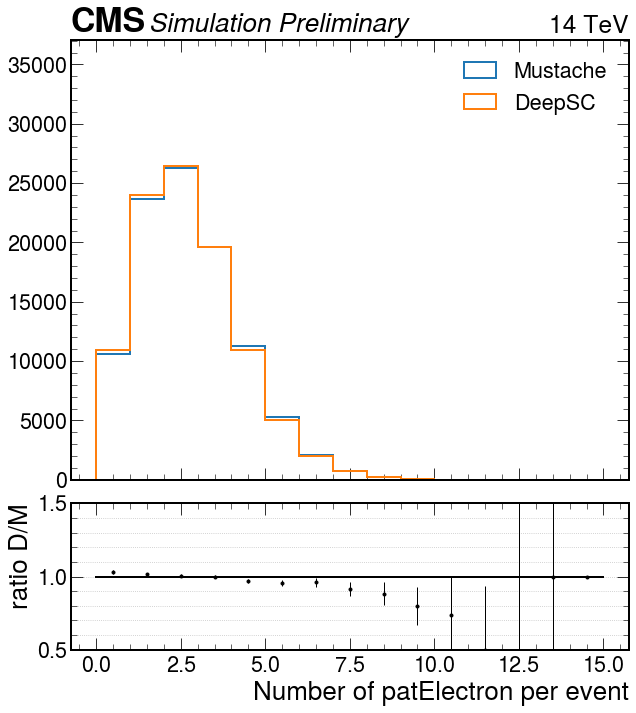

In [21]:
plot_comparison(ak.num(dfM.patElectron_energy,axis=1), ak.num(dfD.patElectron_energy,axis=1),
                var=f"npatele", label="Number of patElectron per event",
                output_folder=output_folder,
                bins=15, xrange=(0,15), ratio_lim=(0.5,1.5))

###  ID

B: 99998.0
A. 100000.0


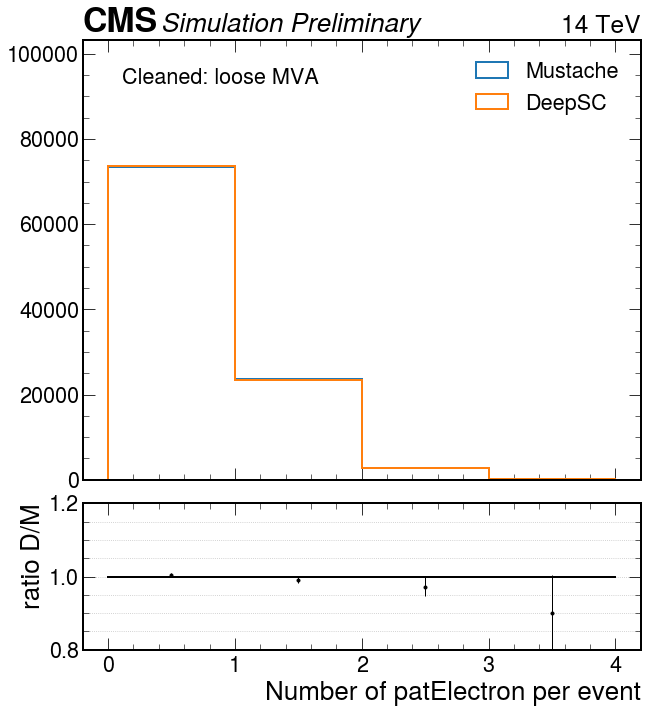

In [84]:
plot_comparison(ak.num(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDloose==1],axis=1), 
                ak.num(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDloose==1],axis=1),
                var=f"npatele_cleaned_loose", label="Number of patElectron per event",
                text="Cleaned: loose MVA",
                output_folder=output_folder,texty=0.9,
                bins=4, xrange=(0,4))

B: 99973.0
A. 99985.0


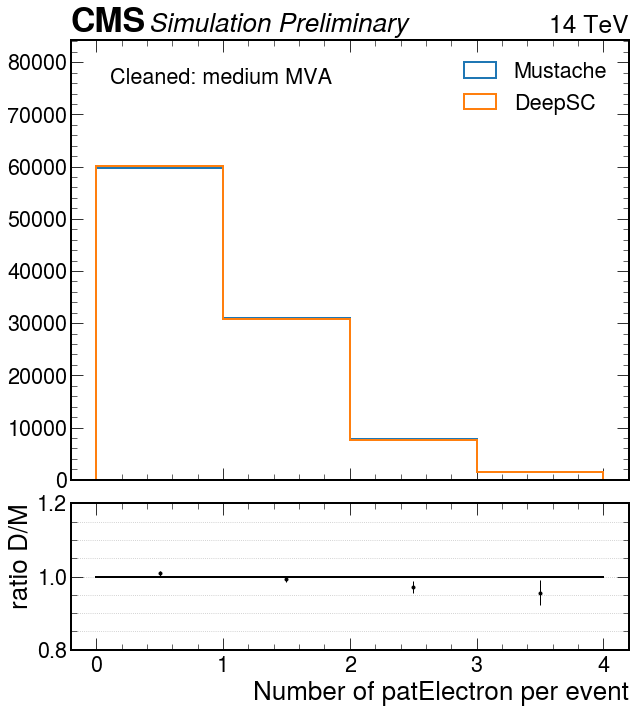

In [85]:
plot_comparison(ak.num(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.num(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"npatele_cleaned_medium", label="Number of patElectron per event",
                text="Cleaned: medium MVA",
                output_folder=output_folder,texty=0.9,
                bins=4, xrange=(0,4))

B: 99992.0
A. 99997.0


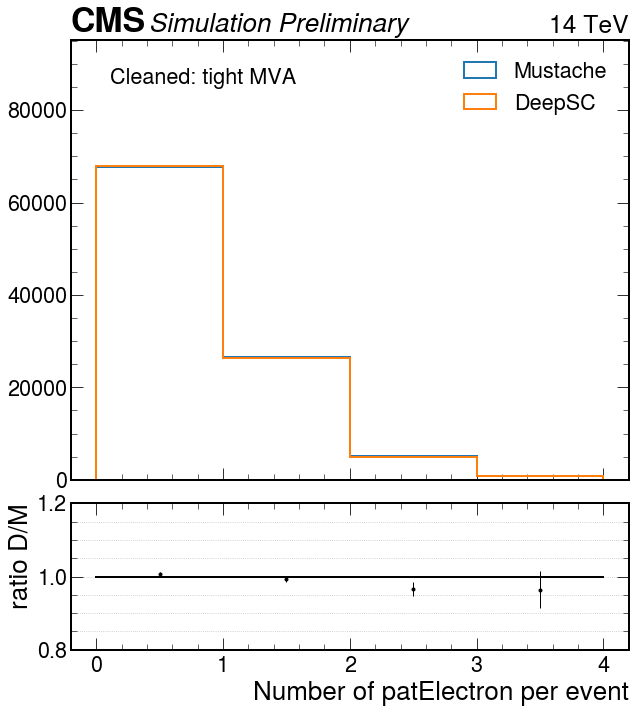

In [86]:
plot_comparison(ak.num(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDtight==1],axis=1), 
                ak.num(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDtight==1],axis=1),
                var=f"npatele_cleaned_tight", label="Number of patElectron per event",
                text="Cleaned: tight MVA",
                output_folder=output_folder,texty=0.9,
                bins=4, xrange=(0,4))

### patElectron kinematic

B: 228073.0
A. 224562.0


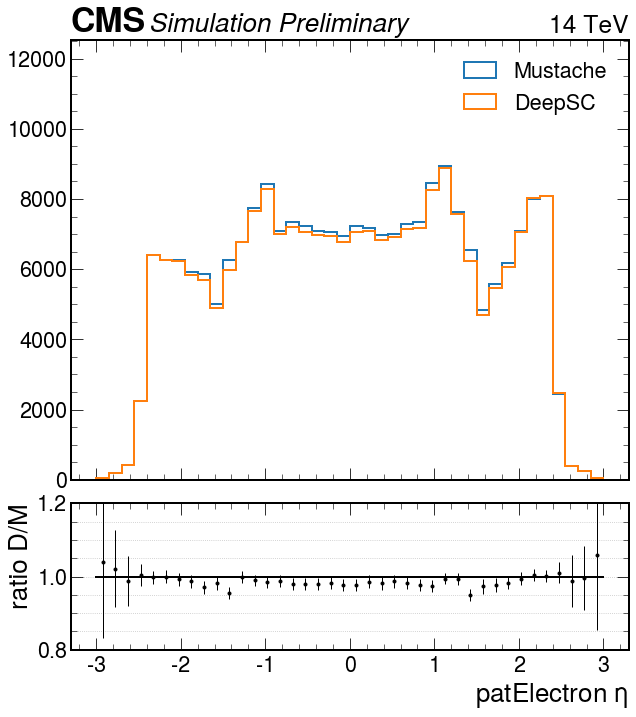

In [40]:
plot_comparison(ak.flatten(dfM.patElectron_eta,axis=1), ak.flatten(dfD.patElectron_eta,axis=1),
                var=f"patElectron_eta", label="patElectron $\eta$",
                output_folder=output_folder,
                bins=40, xrange=(-3,3))

B: 29627.0
A. 29218.0


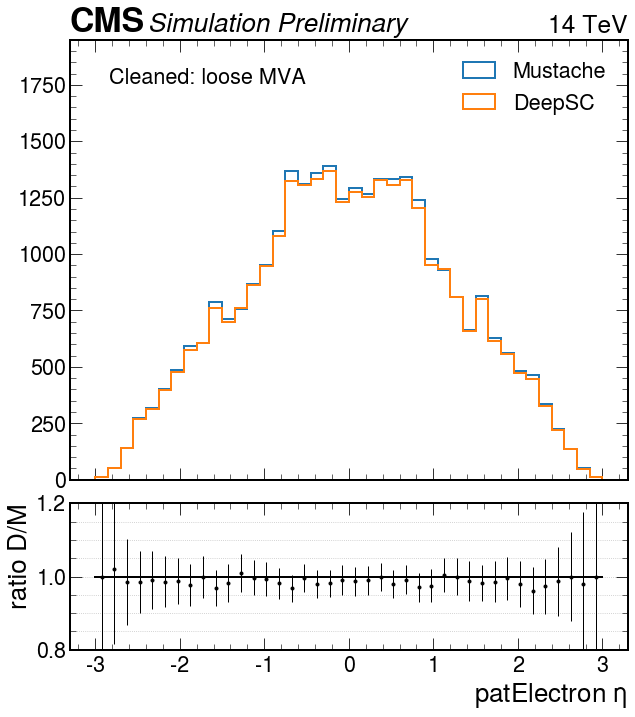

In [80]:
plot_comparison(ak.flatten(dfM.patElectron_eta[dfM.patElectron_egmMVAElectronIDloose==1],axis=1), 
                ak.flatten(dfD.patElectron_eta[dfD.patElectron_egmMVAElectronIDloose==1],axis=1),
                var=f"patElectron_eta_cleaned_loose", label="patElectron $\eta$",
                text="Cleaned: loose MVA",texty=0.9,
                output_folder=output_folder,
                bins=40, xrange=(-3,3))

B: 51428.0
A. 50534.0


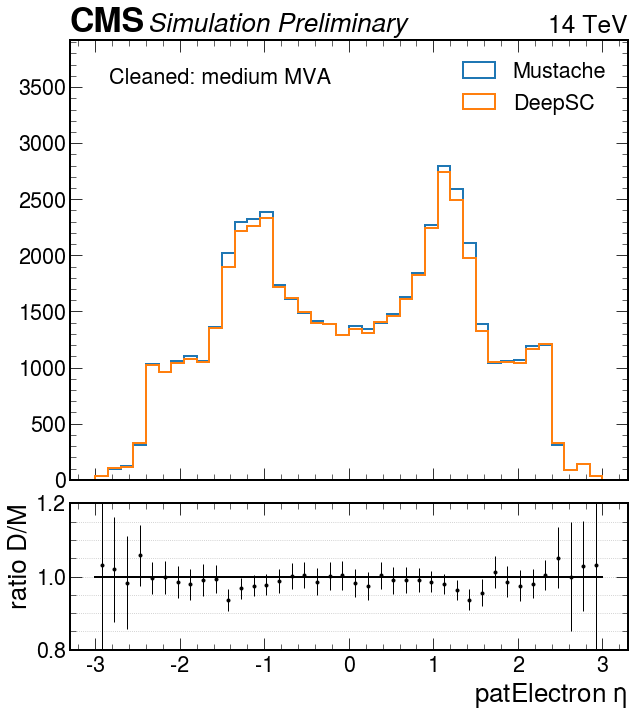

In [78]:
plot_comparison(ak.flatten(dfM.patElectron_eta[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.flatten(dfD.patElectron_eta[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"patElectron_eta_cleaned_medium", label="patElectron $\eta$",
                text="Cleaned: medium MVA",texty=0.9,
                output_folder=output_folder,
                bins=40, xrange=(-3,3))

B: 39071.0
A. 38437.0


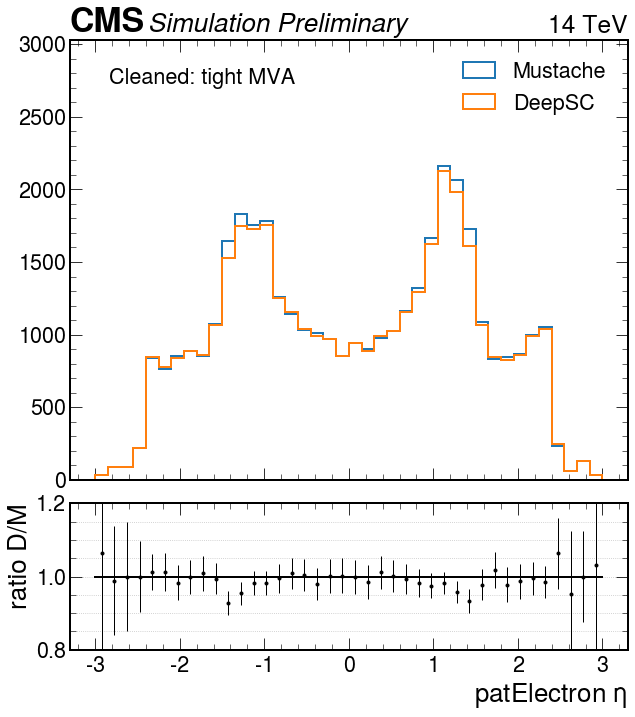

In [79]:
plot_comparison(ak.flatten(dfM.patElectron_eta[dfM.patElectron_egmMVAElectronIDtight==1],axis=1), 
                ak.flatten(dfD.patElectron_eta[dfD.patElectron_egmMVAElectronIDtight==1],axis=1),
                var=f"patElectron_eta_cleaned_tight", label="patElectron $\eta$",
                text="Cleaned: tight MVA",texty=0.9,
                output_folder=output_folder,
                bins=40, xrange=(-3,3))

B: 219424.0
A. 215309.0


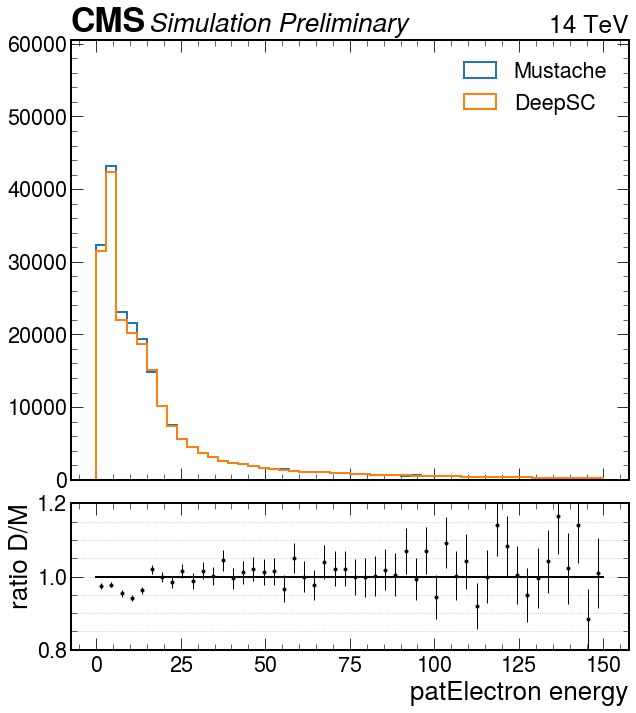

In [76]:
plot_comparison(ak.flatten(dfM.patElectron_energy,axis=1), ak.flatten(dfD.patElectron_energy,axis=1),
                var=f"patElectron_energy", label="patElectron energy",
                output_folder=output_folder,texty=0.9,
                bins=50, xrange=(0,150))

B: 24169.0
A. 23762.0


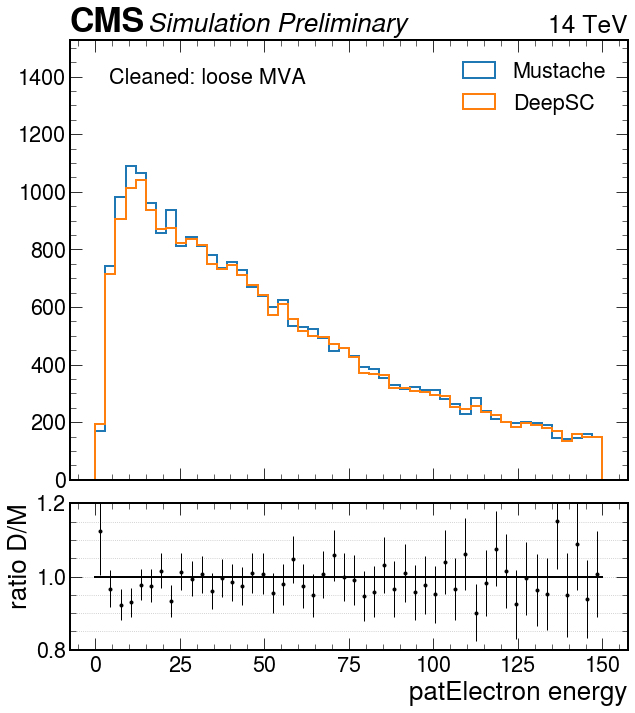

In [75]:
plot_comparison(ak.flatten(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDloose==1],axis=1), 
                ak.flatten(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDloose==1],axis=1),
                var=f"patElectron_energy_cleaned_loose", label="patElectron energy",
                text="Cleaned: loose MVA", 
                output_folder=output_folder,texty=0.9,
                bins=50, xrange=(0,150))

B: 45682.0
A. 44787.0


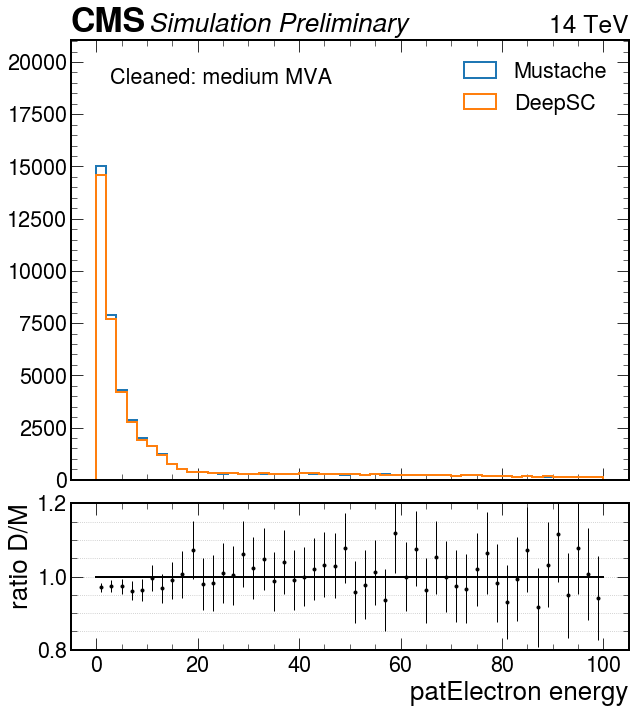

In [74]:
plot_comparison(ak.flatten(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.flatten(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"patElectron_energy_cleaned_medium", label="patElectron energy",
                text="Cleaned: medium MVA",texty=0.9,
                output_folder=output_folder,
                bins=50, xrange=(0,100))

B: 31894.0
A. 31241.0


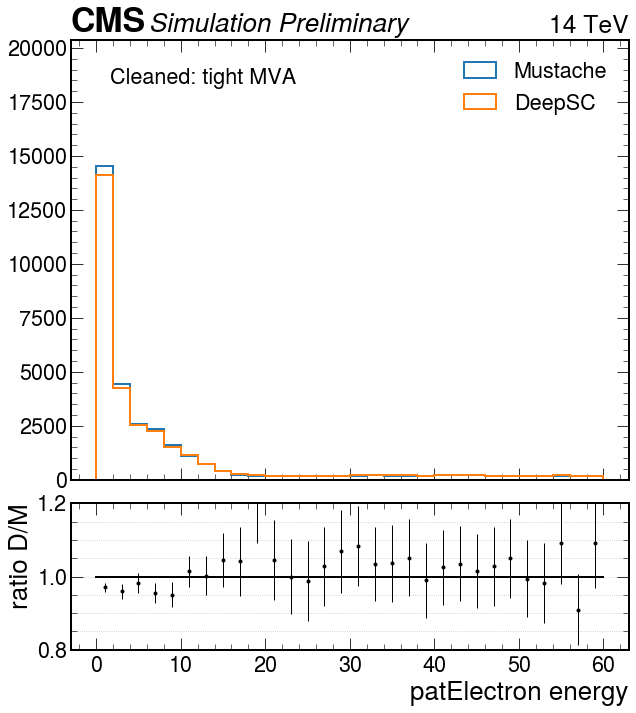

In [19]:
plot_comparison(ak.flatten(dfM.patElectron_energy[dfM.patElectron_egmMVAElectronIDtight==1],axis=1), 
                ak.flatten(dfD.patElectron_energy[dfD.patElectron_egmMVAElectronIDtight==1],axis=1),
                var=f"patElectron_energy_cleaned_tight", label="patElectron energy",
                text="Cleaned: tight MVA",
                output_folder=output_folder,texty=0.9,
                bins=30, xrange=(0,60))

### N clusters in patElectron

B: 39076.0
A. 38440.0


/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


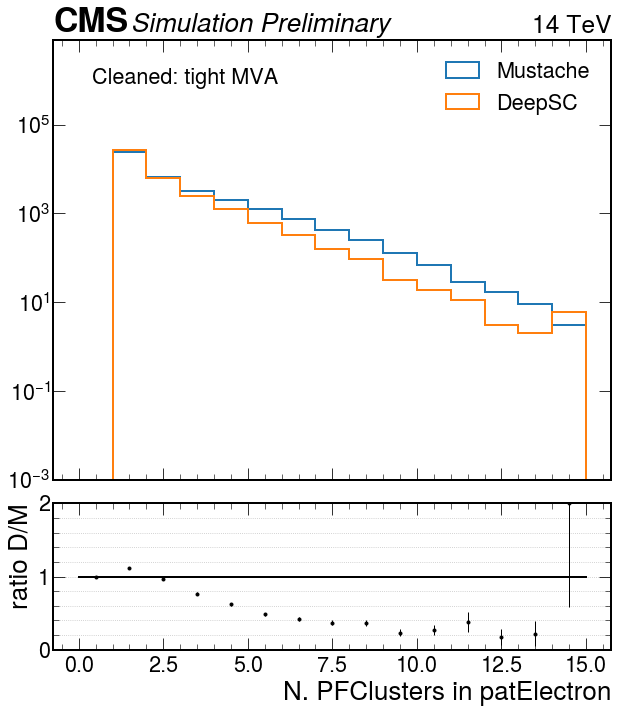

In [90]:
plot_comparison(ak.flatten(dfM.patElectron_nPFClusters[dfM.patElectron_egmMVAElectronIDtight==1],axis=1), 
                ak.flatten(dfD.patElectron_nPFClusters[dfD.patElectron_egmMVAElectronIDtight==1],axis=1),
                var=f"patElectron_nPFCls_cleaned_tight", label="N. PFClusters in patElectron",
                text="Cleaned: tight MVA",
                output_folder=output_folder, ylog=True, texty=0.9,
                bins=15, xrange=(0,15), ratio_lim=(0, 2))

B: 51433.0
A. 50537.0


/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


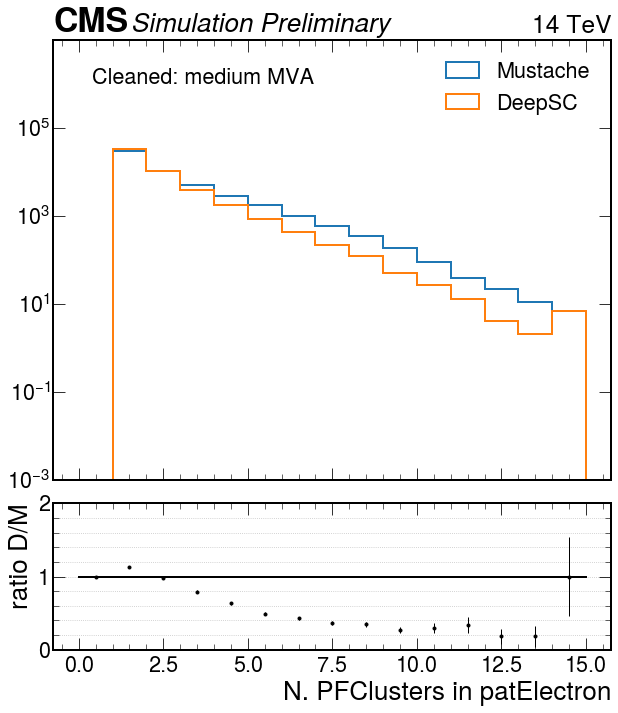

In [81]:
plot_comparison(ak.flatten(dfM.patElectron_nPFClusters[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.flatten(dfD.patElectron_nPFClusters[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"patElectron_nPFCls_cleaned_medium", label="N. PFClusters in patElectron",
                text="Cleaned: medium MVA",texty=0.9,
                output_folder=output_folder, ylog=True,
                bins=15, xrange=(0,15), ratio_lim=(0, 2))

B: 29626.0
A. 29218.0


/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_43927/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


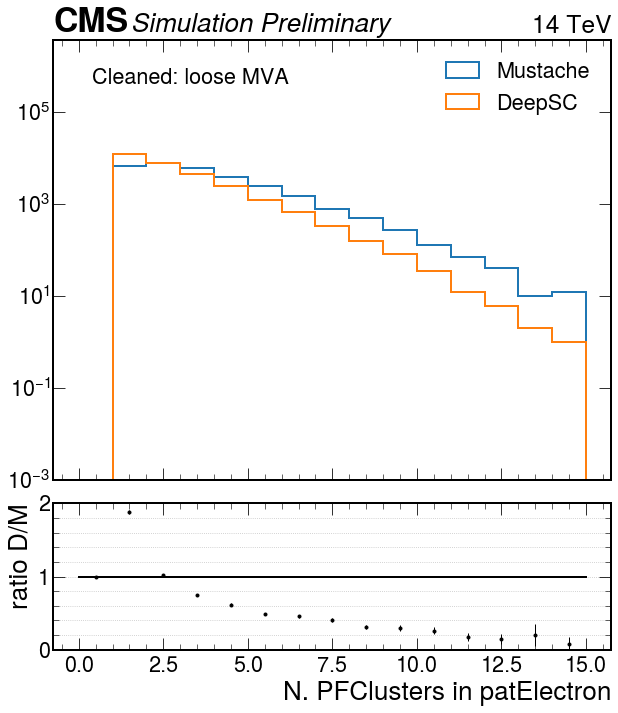

In [82]:
plot_comparison(ak.flatten(dfM.patElectron_nPFClusters[dfM.patElectron_egmMVAElectronIDloose==1],axis=1), 
                ak.flatten(dfD.patElectron_nPFClusters[dfD.patElectron_egmMVAElectronIDloose==1],axis=1),
                var=f"patElectron_nPFCls_cleaned_loose", label="N. PFClusters in patElectron",
                text="Cleaned: loose MVA",texty=0.9,
                output_folder=output_folder, ylog=True,
                bins=15, xrange=(0,15), ratio_lim=(0, 2))

### patElectron refinedSC

B: 28639.0
A. 27964.0


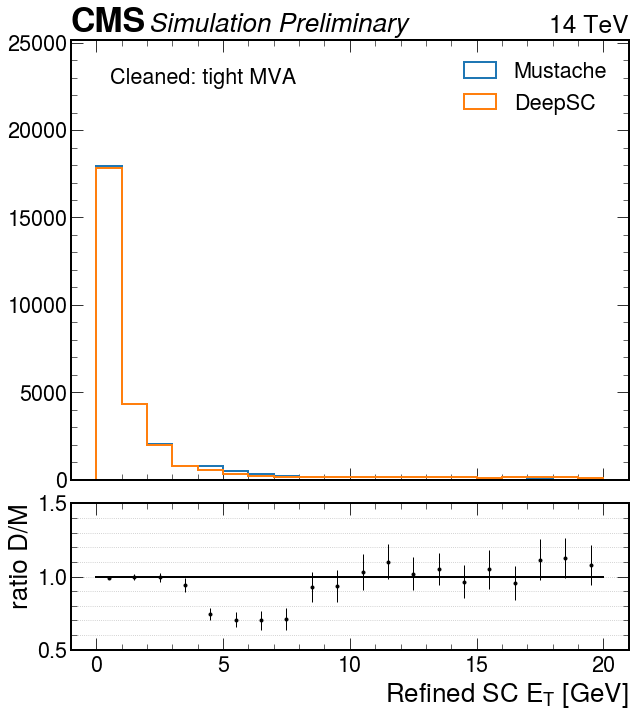

In [99]:
plot_comparison(ak.flatten(dfM.patElectron_refinedSCEt[dfM.patElectron_egmMVAElectronIDtight==1],axis=1), 
                ak.flatten(dfD.patElectron_refinedSCEt[dfD.patElectron_egmMVAElectronIDtight==1],axis=1),
                var=f"patElectron_refinedSCEt_cleaned_tight_zoom", label="Refined SC $E_T$ [GeV]",
                text="Cleaned: tight MVA",texty=0.9,
                output_folder=output_folder,
                bins=20, xrange=(0,20), ratio_lim=(0.5, 1.5))

B: 37644.0
A. 36774.0


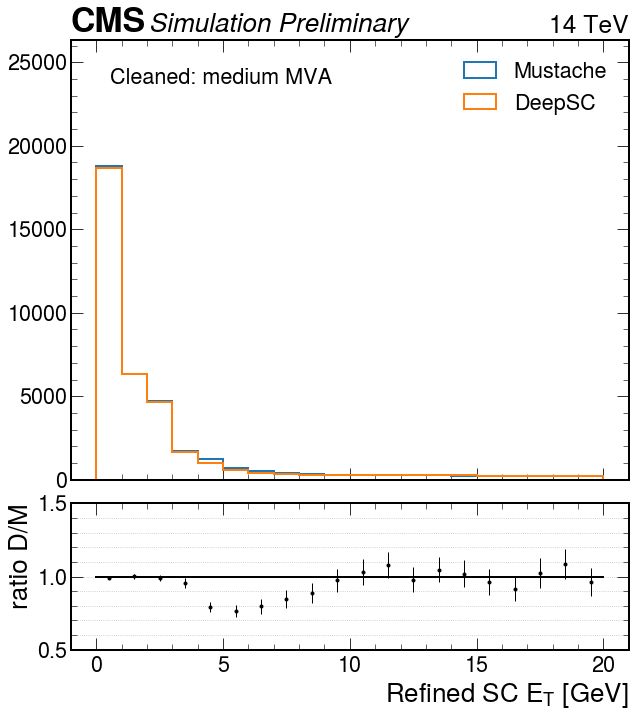

In [96]:
plot_comparison(ak.flatten(dfM.patElectron_refinedSCEt[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.flatten(dfD.patElectron_refinedSCEt[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"patElectron_refinedSCEt_cleaned_medium_zoom", label="Refined SC $E_T$ [GeV]",
                text="Cleaned: medium MVA",texty=0.9,
                output_folder=output_folder,
                bins=20, xrange=(0,20), ratio_lim=(0.5, 1.5))

B: 49082.0
A. 48215.0


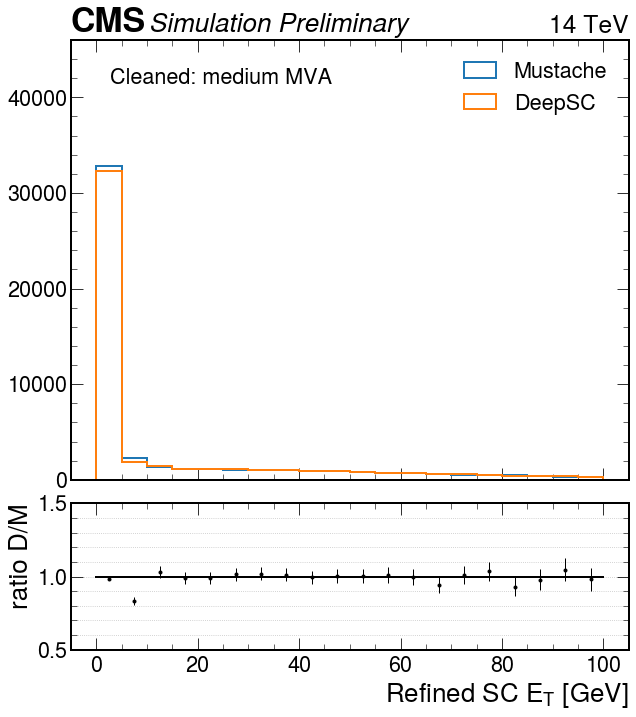

In [97]:
plot_comparison(ak.flatten(dfM.patElectron_refinedSCEt[dfM.patElectron_egmMVAElectronIDmedium==1],axis=1), 
                ak.flatten(dfD.patElectron_refinedSCEt[dfD.patElectron_egmMVAElectronIDmedium==1],axis=1),
                var=f"patElectron_refinedSCEt_cleaned_medium", label="Refined SC $E_T$ [GeV]",
                text="Cleaned: medium MVA",texty=0.9,
                output_folder=output_folder,
                bins=20, xrange=(0,100), ratio_lim=(0.5, 1.5))

In [65]:
[f for f in dfM.fields if "patElectron" in f]

['patElectron_index',
 'patElectron_seedRawId',
 'patElectron_classification',
 'patElectron_nPFClusters',
 'patElectron_charge',
 'patElectron_isEB',
 'patElectron_isEE',
 'patElectron_isEBEEGap',
 'patElectron_isEBEtaGap',
 'patElectron_isEBPhiGap',
 'patElectron_isEEDeeGap',
 'patElectron_isEERingGap',
 'patElectron_isEcalDriven',
 'patElectron_isTrackerDriven',
 'patElectron_eta',
 'patElectron_phi',
 'patElectron_p',
 'patElectron_pt',
 'patElectron_pIn',
 'patElectron_pOut',
 'patElectron_pAtCalo',
 'patElectron_deltaEtaIn',
 'patElectron_deltaPhiIn',
 'patElectron_deltaEtaSeedClusterAtCalo',
 'patElectron_deltaPhiSeedClusterAtCalo',
 'patElectron_deltaEtaEleClusterAtCalo',
 'patElectron_deltaPhiEleClusterAtCalo',
 'patElectron_misHits',
 'patElectron_nAmbiguousGsfTracks',
 'patElectron_trackFbrem',
 'patElectron_superClusterFbrem',
 'patElectron_energy',
 'patElectron_energyErr',
 'patElectron_ecalEnergy',
 'patElectron_ecalEnergyErr',
 'patElectron_et',
 'patElectron_mt',
 'pat

## patJets

In [24]:
ak.num(dfM.patJet_energy)

<Array [58, 55, 52, 68, 69, ... 71, 74, 62, 56] type='100000 * int64'>

B: 0.0
A. 0.0


/tmp/ipykernel_31466/937073966.py:87: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, mmax*1.4)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,
/work/dvalsecc/miniconda3/envs/clustering_tf2.3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


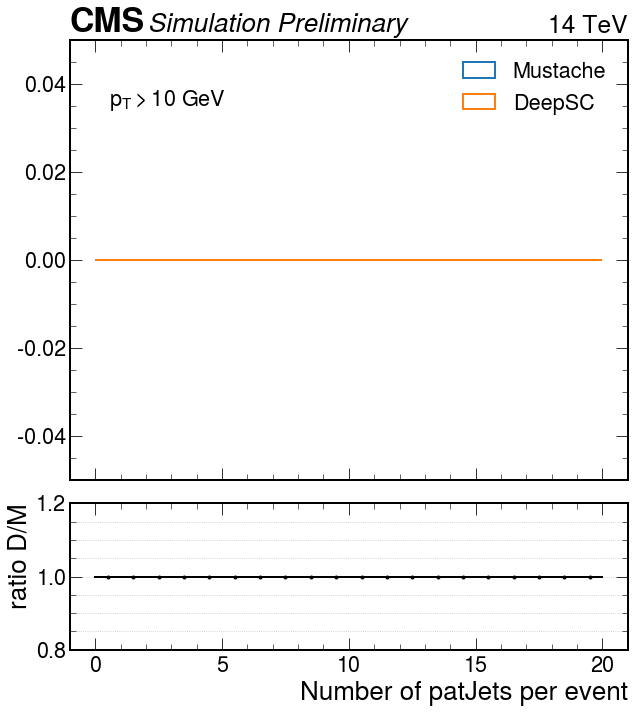

In [23]:
plot_comparison(ak.num(dfM.patJet_energy[dfM.patJet_pt>10],axis=1), 
                ak.num(dfD.patJet_energy[dfD.patJet_pt>10],axis=1),
                var=f"npatjet", label="Number of patJets per event",
                text="$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder,
                bins=20, xrange=(0,20))

B: 100000.0
A. 100000.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


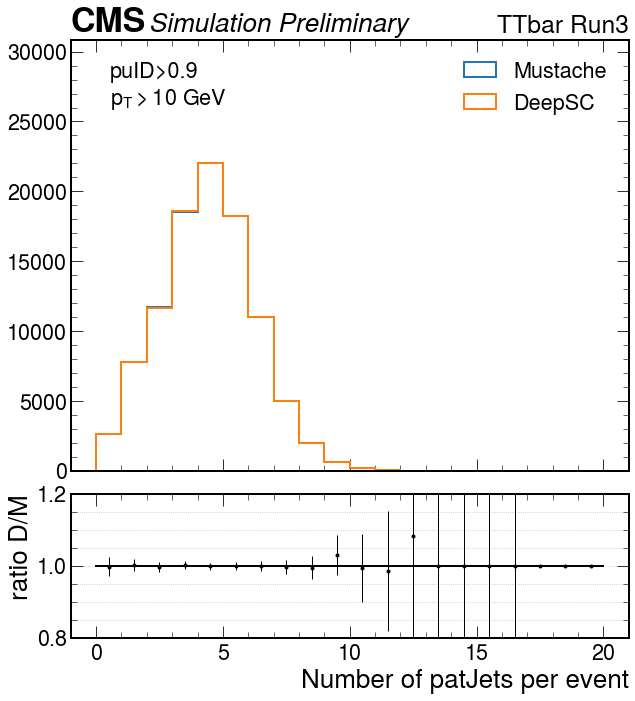

In [124]:
plot_comparison(ak.num(dfM.patJet_energy[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.num(dfD.patJet_energy[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"npatjet", label="Number of patJets per event",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder,
                bins=20, xrange=(0,20))

B: 195793.0
A. 195827.0


/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:90: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_31466/937073966.py:93: RuntimeWarning: invalid value encountered in divide
  A/B,


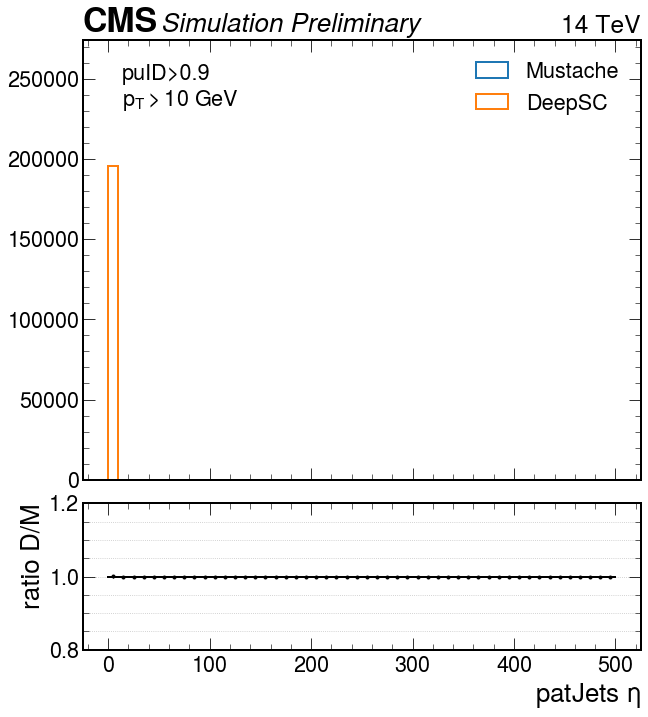

In [20]:
plot_comparison(ak.flatten(dfM.patJet_eta[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.flatten(dfD.patJet_eta[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"patjet_eta", label="patJets $\eta$",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder,
                bins=50, xrange=(0,500))

B: 369538.0
A. 369523.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


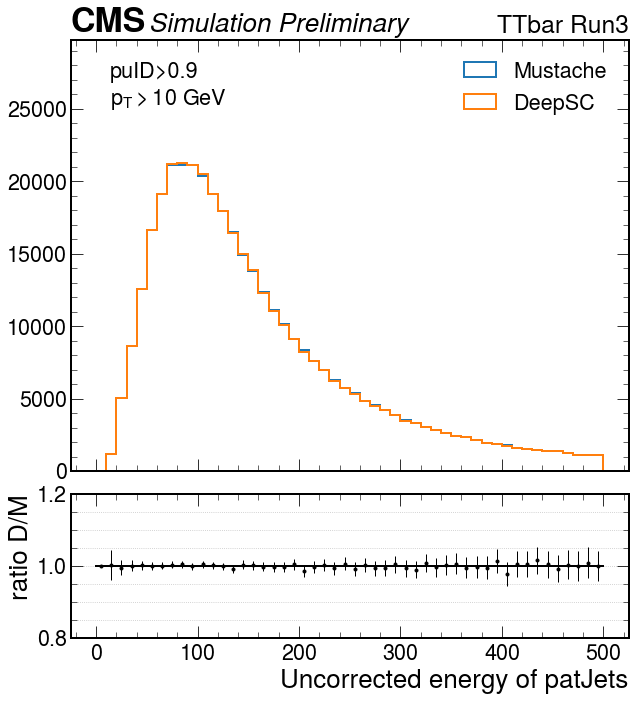

In [125]:
plot_comparison(ak.flatten(dfM.patJet_uncorrectedEnergy[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.flatten(dfD.patJet_uncorrectedEnergy[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"patjet_energy_uncorr", label="Uncorrected energy of patJets",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder,
                bins=50, xrange=(0,500))

B: 363318.0
A. 363308.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


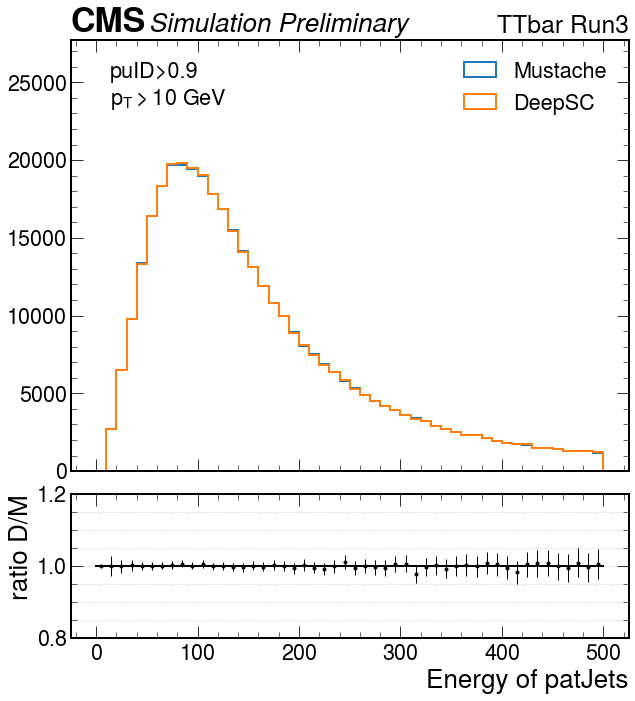

In [126]:
plot_comparison(ak.flatten(dfM.patJet_energy[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.flatten(dfD.patJet_energy[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"patjet_energy", label="Energy of patJets",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder,
                bins=50, xrange=(0,500))

B: 385523.0
A. 385296.0


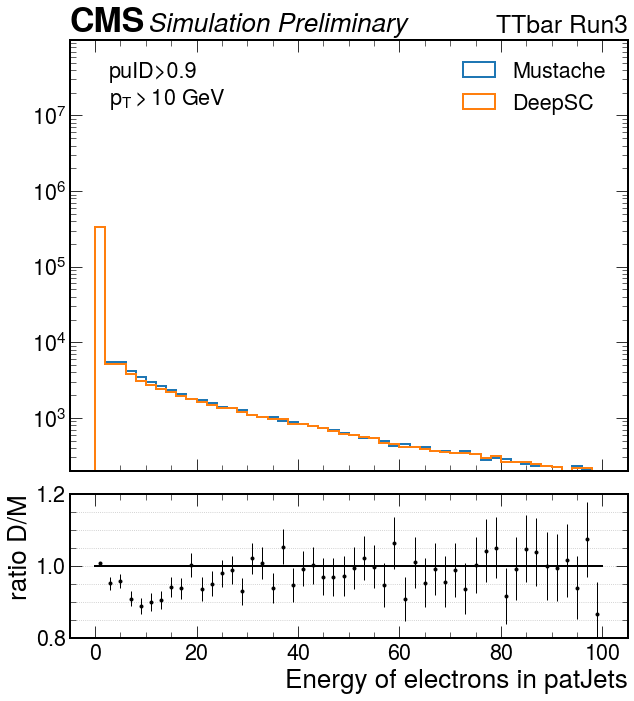

In [127]:
plot_comparison(ak.flatten(dfM.patJet_electronEnergy[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.flatten(dfD.patJet_electronEnergy[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"patjet_electron_energy", label="Energy of electrons in patJets",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,100))

B: 392641.0
A. 392634.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


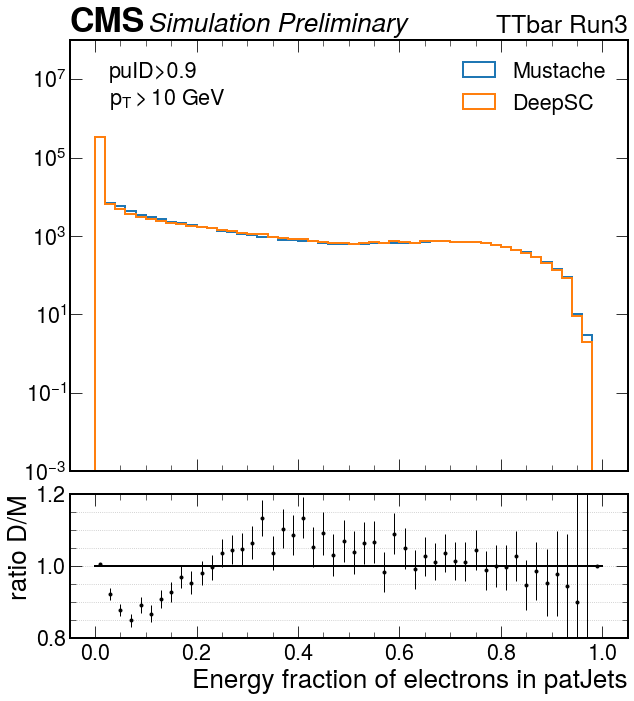

In [129]:
plot_comparison(ak.flatten(dfM.patJet_electronEnergyFraction[(dfM.patJet_pt>10)&(dfM.patJet_puID>0.9)],axis=1), 
                ak.flatten(dfD.patJet_electronEnergyFraction[(dfD.patJet_pt>10)&(dfD.patJet_puID>0.9)],axis=1),
                var=f"patjet_electron_energy_fraction", label="Energy fraction of electrons in patJets",
                text="puID>0.9\n$p_T>10$ GeV", texty=0.85,                
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,1))

B: 939965.0
A. 940098.0


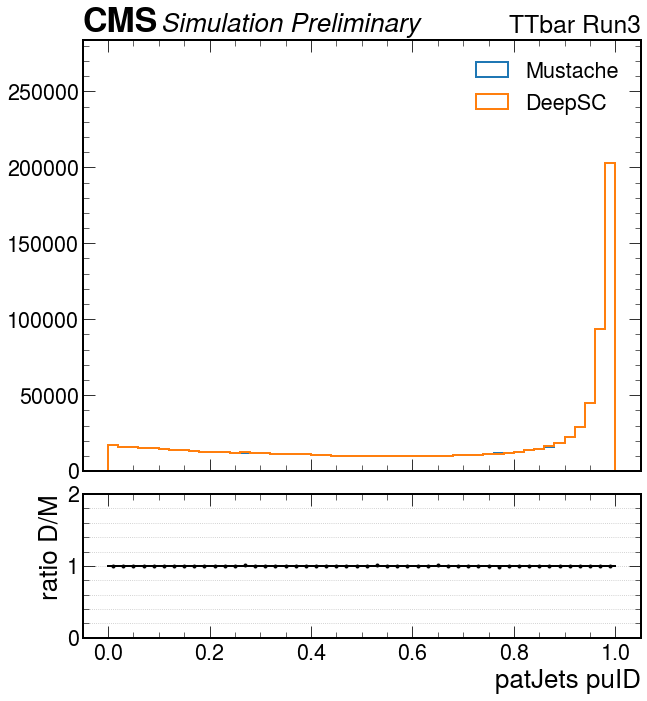

In [130]:
plot_comparison(ak.flatten(dfM.patJet_puID,axis=1), 
                ak.flatten(dfD.patJet_puID,axis=1),
                var=f"patJet_puid", label="patJets puID",
                output_folder=output_folder,
                bins=50, xrange=(0,1), ratio_lim=(0,2))

# Count the number of rechits per cluster in each supercluster

Plot for the evaluation in CMSSW

B: 99999.0
A. 99999.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: divide by zero encountered in true_divide
  A/B,
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


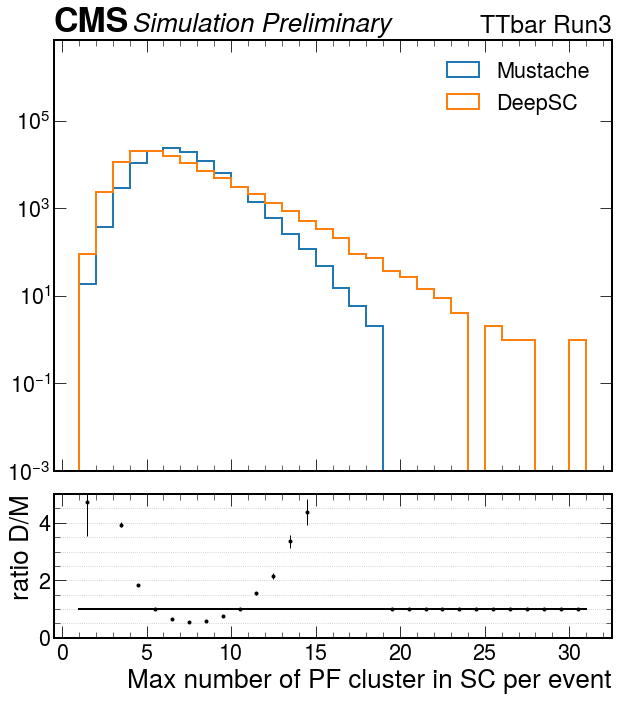

In [132]:
plot_comparison(ak.max(dfM.superCluster_nPFClusters, axis=1),
                ak.max(dfD.superCluster_nPFClusters, axis=1),
                var=f"nMax_cls_inSC_perevent", label="Max number of PF cluster in SC per event",
                output_folder=output_folder, ylog=True,
                bins=30, xrange=(1,31), ratio_lim=(0,5))

B: 1820727.0
A. 1549631.0


/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:90: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: divide by zero encountered in true_divide
  A/B,
/tmp/ipykernel_521/4253691877.py:93: RuntimeWarning: invalid value encountered in true_divide
  A/B,


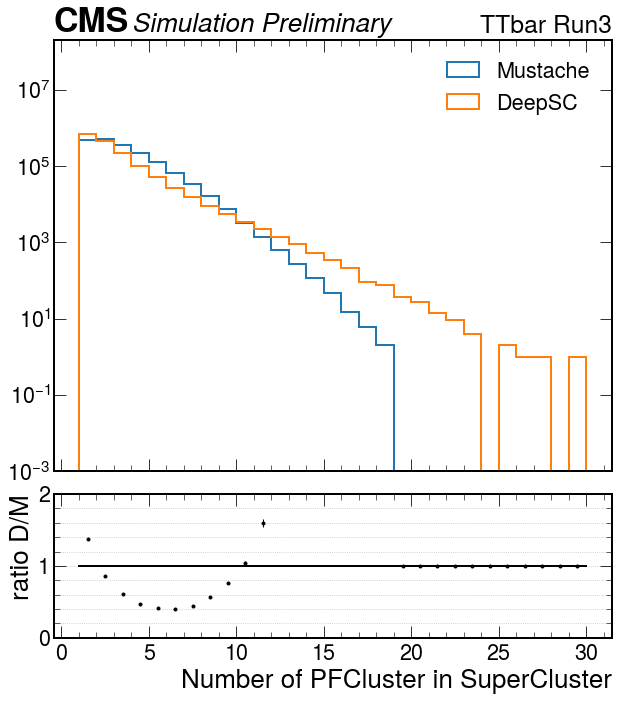

In [133]:
plot_comparison(ak.flatten(dfM.superCluster_nPFClusters,axis=1), 
                ak.flatten(dfD.superCluster_nPFClusters,axis=1),
                var=f"nCl_inSC", label="Number of PFCluster in SuperCluster",
                output_folder=output_folder, ylog=True,
                bins=29, xrange=(1,30), ratio_lim=(0,2))

A. 100000.0


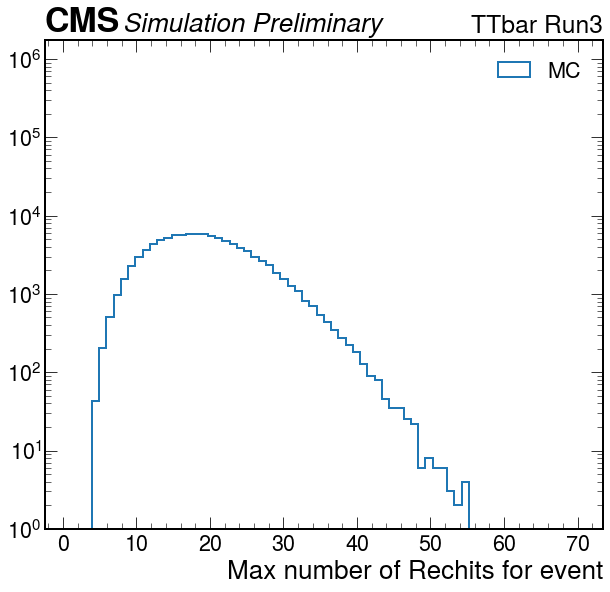

In [135]:
plot_hist(ak.max(dfM.pfCluster_nXtals,axis=1), 
                var=f"maxNxtlas_inCl", label="Max number of Rechits for event",
                output_folder=output_folder, ylog=True,
               legend="MC",
                bins=70, xrange=(1,70))

# Analysis of number of rechits and clusters in SC in the events

Extracted the windows from the ttbar MC, not only the selected clusters

In [5]:
! cp /eos/cms/store/group/dpg_ecal/alca_ecalcalib/bmarzocc/Clustering/TTbar_14TeV_TuneCP5_Pythia8/RawDumper_DeepSC_12_5_0/ttbar_Run3_DeepSC_algoA_withRechit_withClEt.root .

In [11]:
dfR = uproot.lazy(["ttbar_Run3_DeepSC_algoA_withRechit_withClEt.root:recosimdumper/caloTree"])

In [8]:
dfR.fields

['nxtals', 'seed_et', 'cls_et']

In [3]:
dfR = uproot.open("ttbar_Run3_DeepSC_algoA_withRechit_withClEt.root:recosimdumper/caloTree")

In [4]:
data  = dfR["nxtals"].array()

Counting object by event or by window

In [5]:
data = dfR.nxtals

In [5]:
data = data[ak.num(data, axis=1)>0] ## at least 1 window

In [6]:
ncls = ak.num(data, axis=2)
nwind = ak.num(data, axis=1)
max_ncls_ev = ak.max(ncls, axis=1)
max_rec = ak.max(data, axis=2)
max_rec_ev = ak.max(max_rec, axis=1)

A. 100000.0


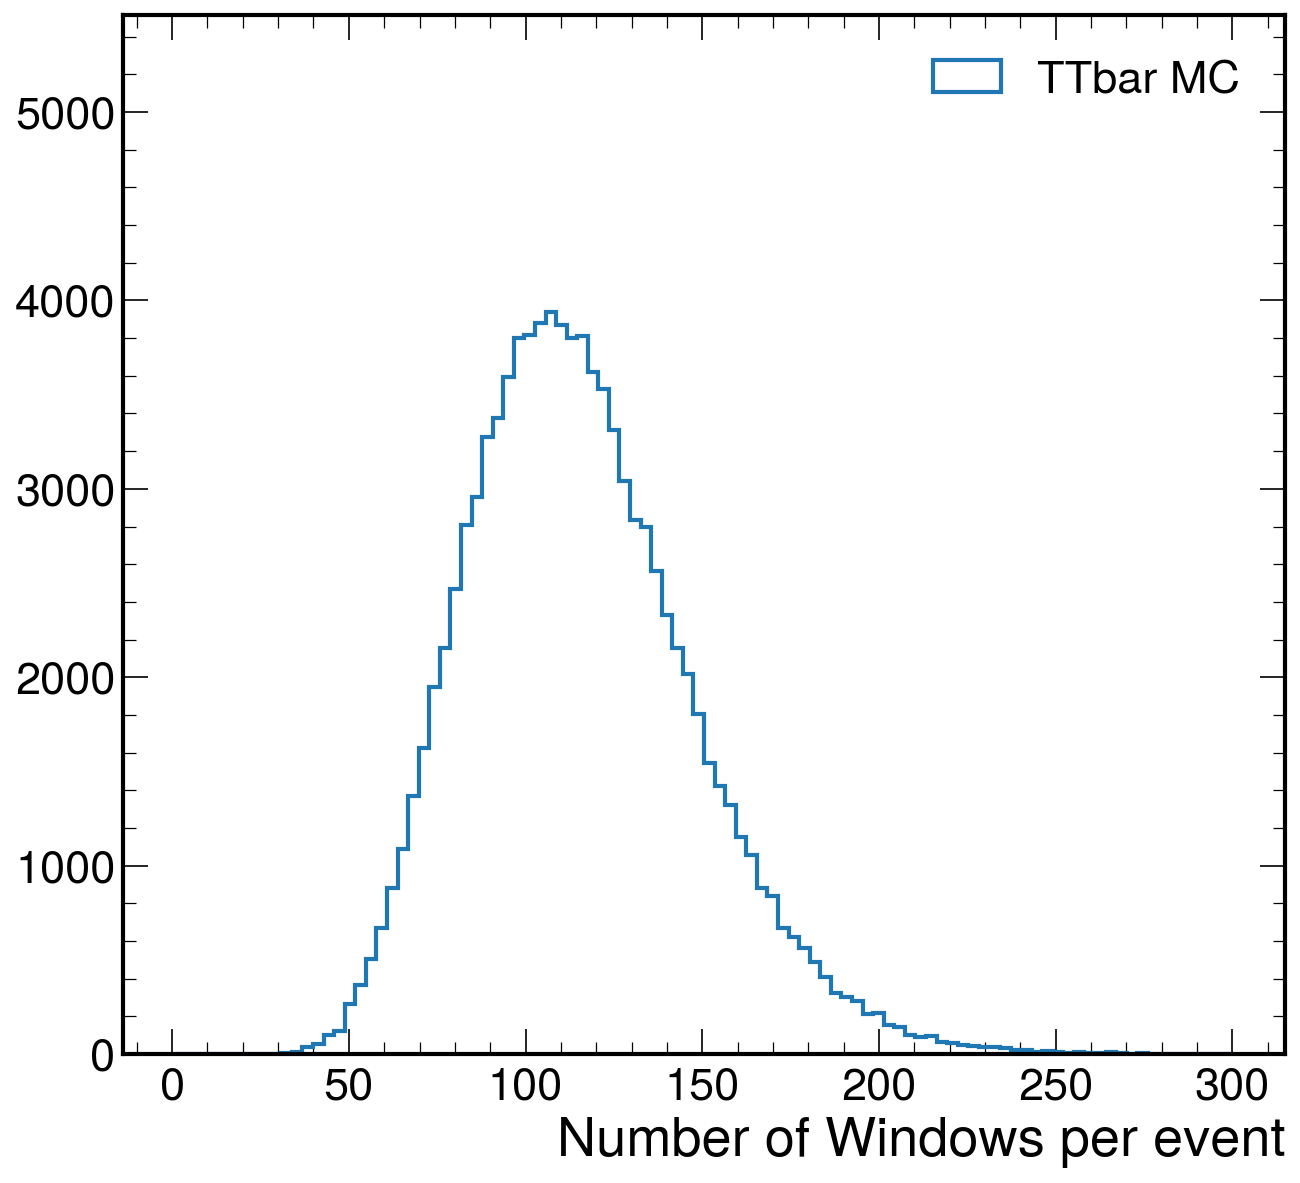

In [16]:
plot_hist(nwind,
        var=f"number_of_window_perevent", label="Number of Windows per event",
        output_folder=output_folder, 
       legend="TTbar MC", rlabel="14 TeV (Run 3)", 
        bins=100, xrange=(1,300), llabel="")

A. 99996.0


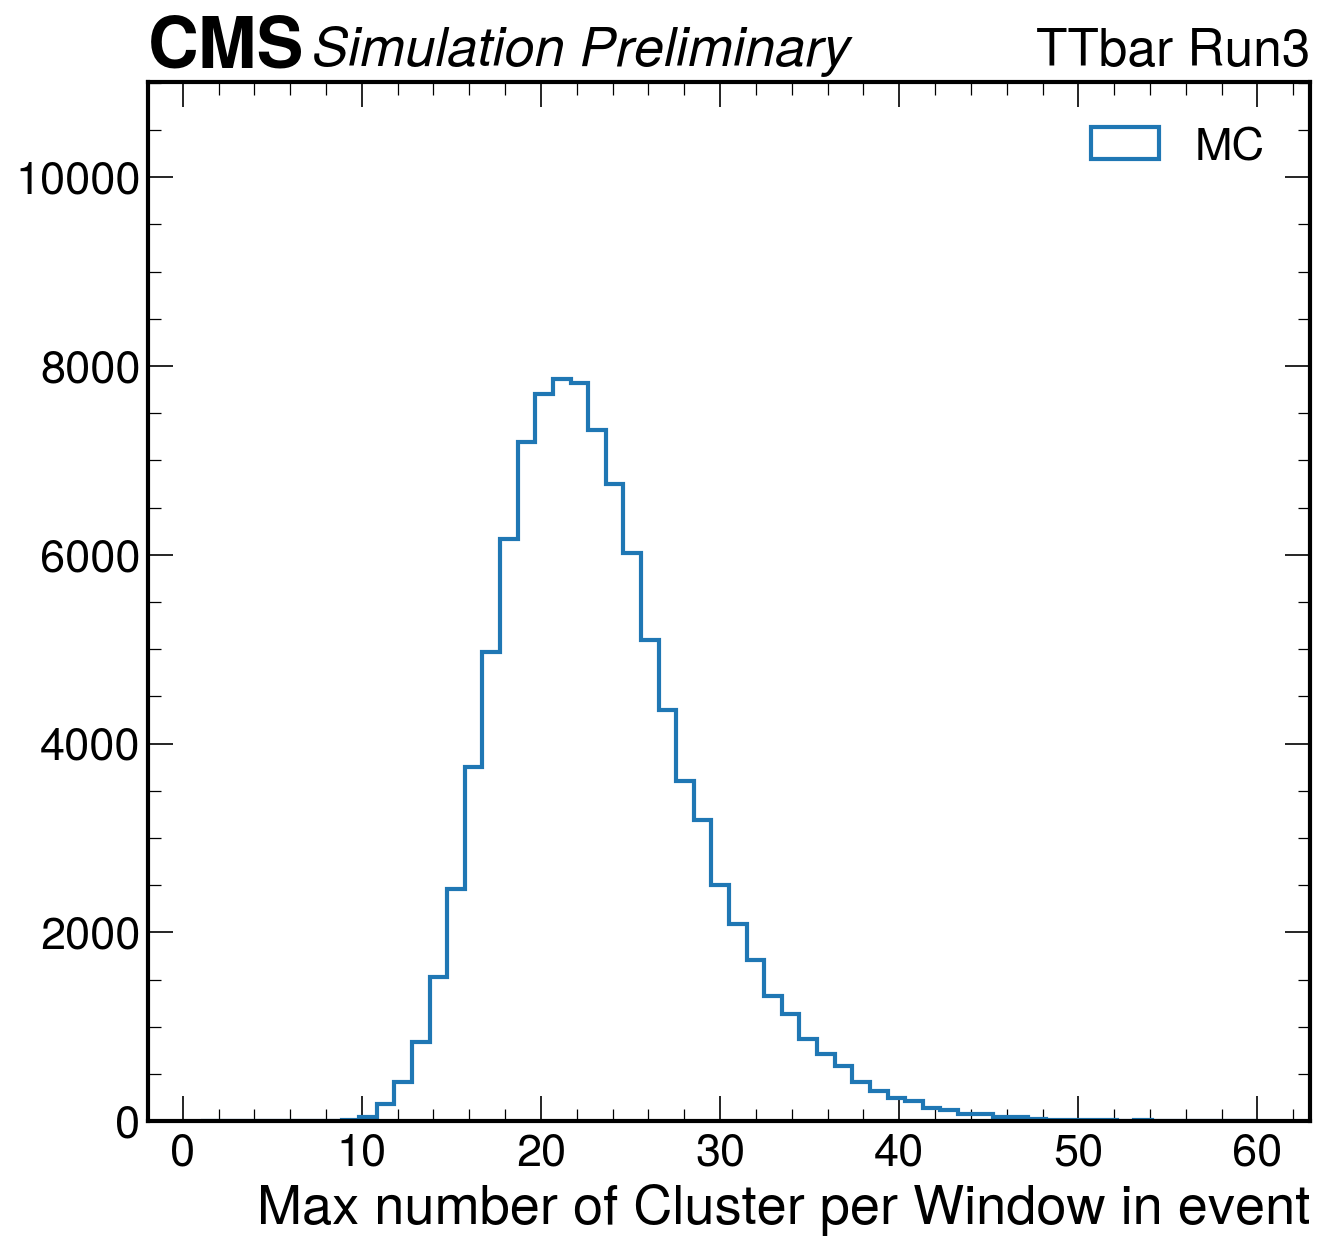

In [39]:
plot_hist(max_ncls_ev,
        var=f"maxnumber_of_cls_perSC_in_event", label="Max number of Cluster per Window in event",
        output_folder=output_folder,
       legend="MC",
        bins=60, xrange=(1,60))

A. 11523336.0


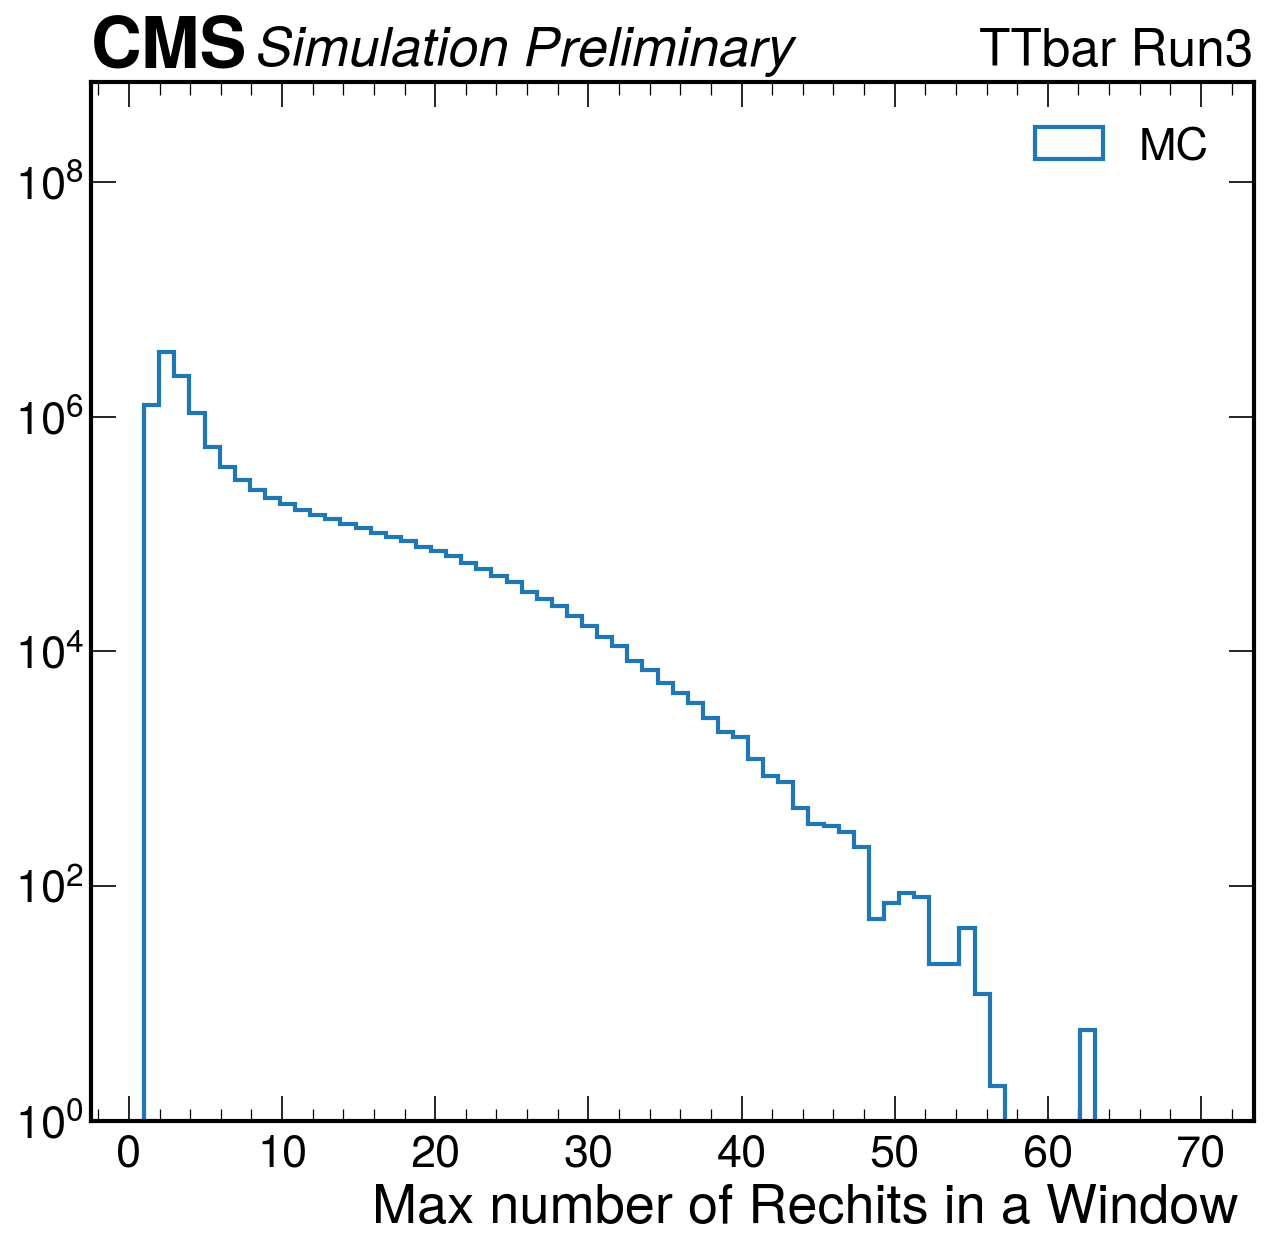

In [44]:
plot_hist(ak.flatten(max_rec), 
                var=f"max_rechits_in_window", label="Max number of Rechits in a Window ",
                output_folder=output_folder, ylog=True,
               legend="MC",
                bins=70, xrange=(1,70))

A. 100000.0


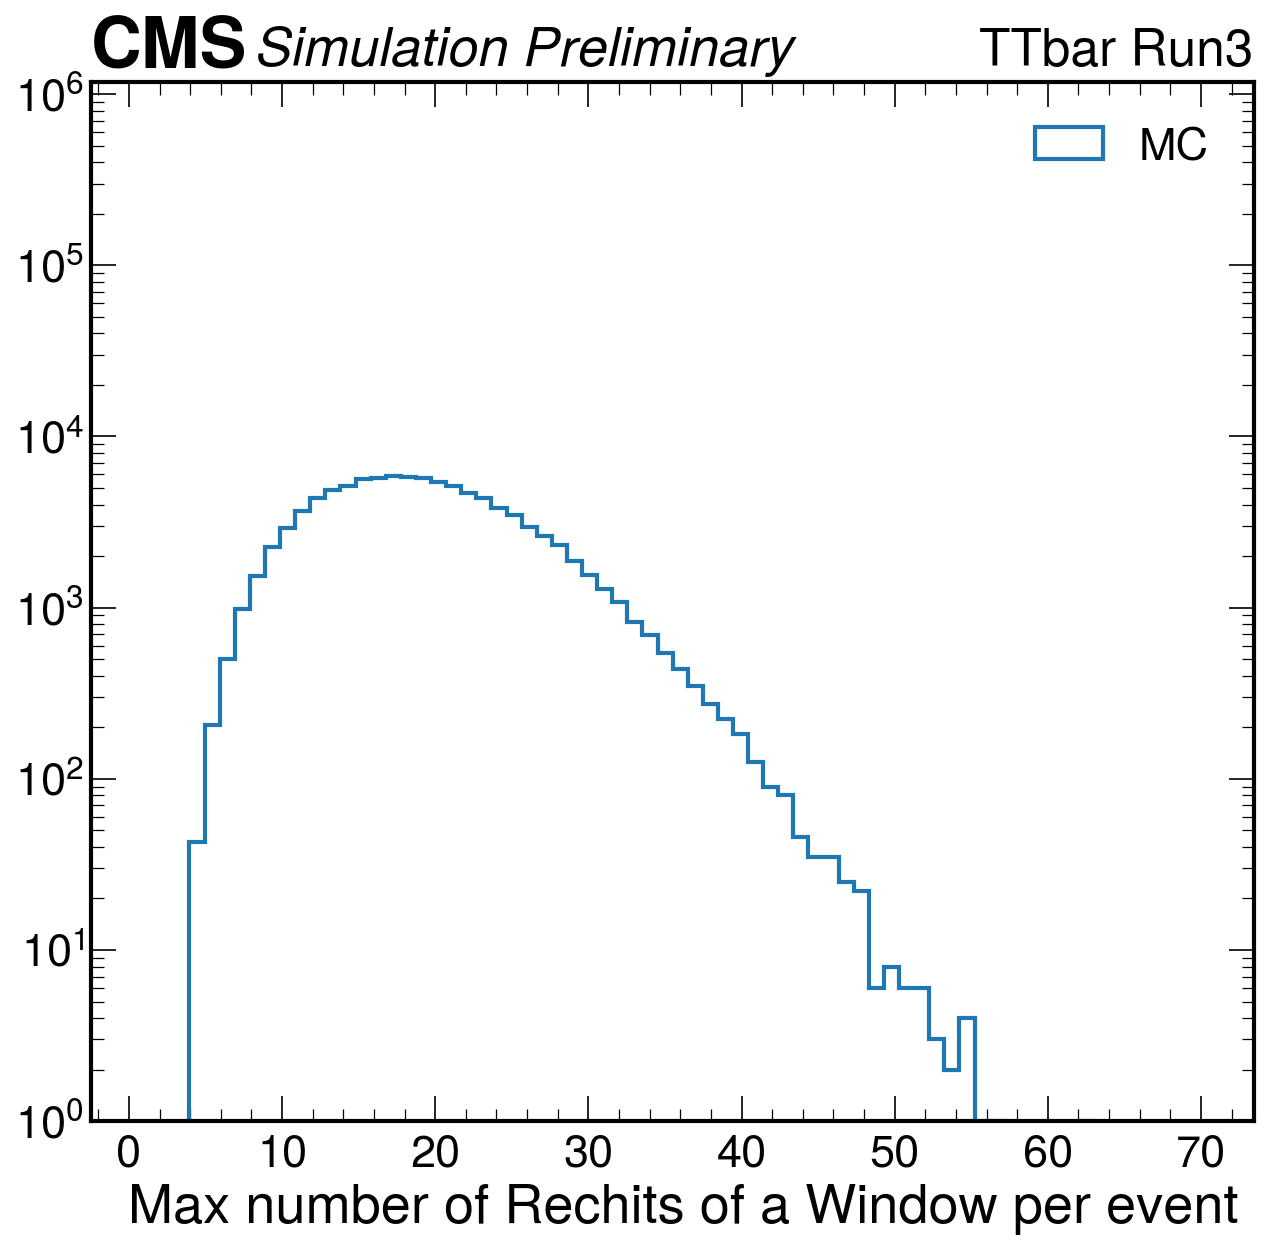

In [45]:
plot_hist(max_rec_ev,
                var=f"max_rechits_in_window_per_Event", label="Max number of Rechits of a Window per event ",
                output_folder=output_folder, ylog=True,
               legend="MC",
                bins=70, xrange=(1,70))

A. 11523103.0


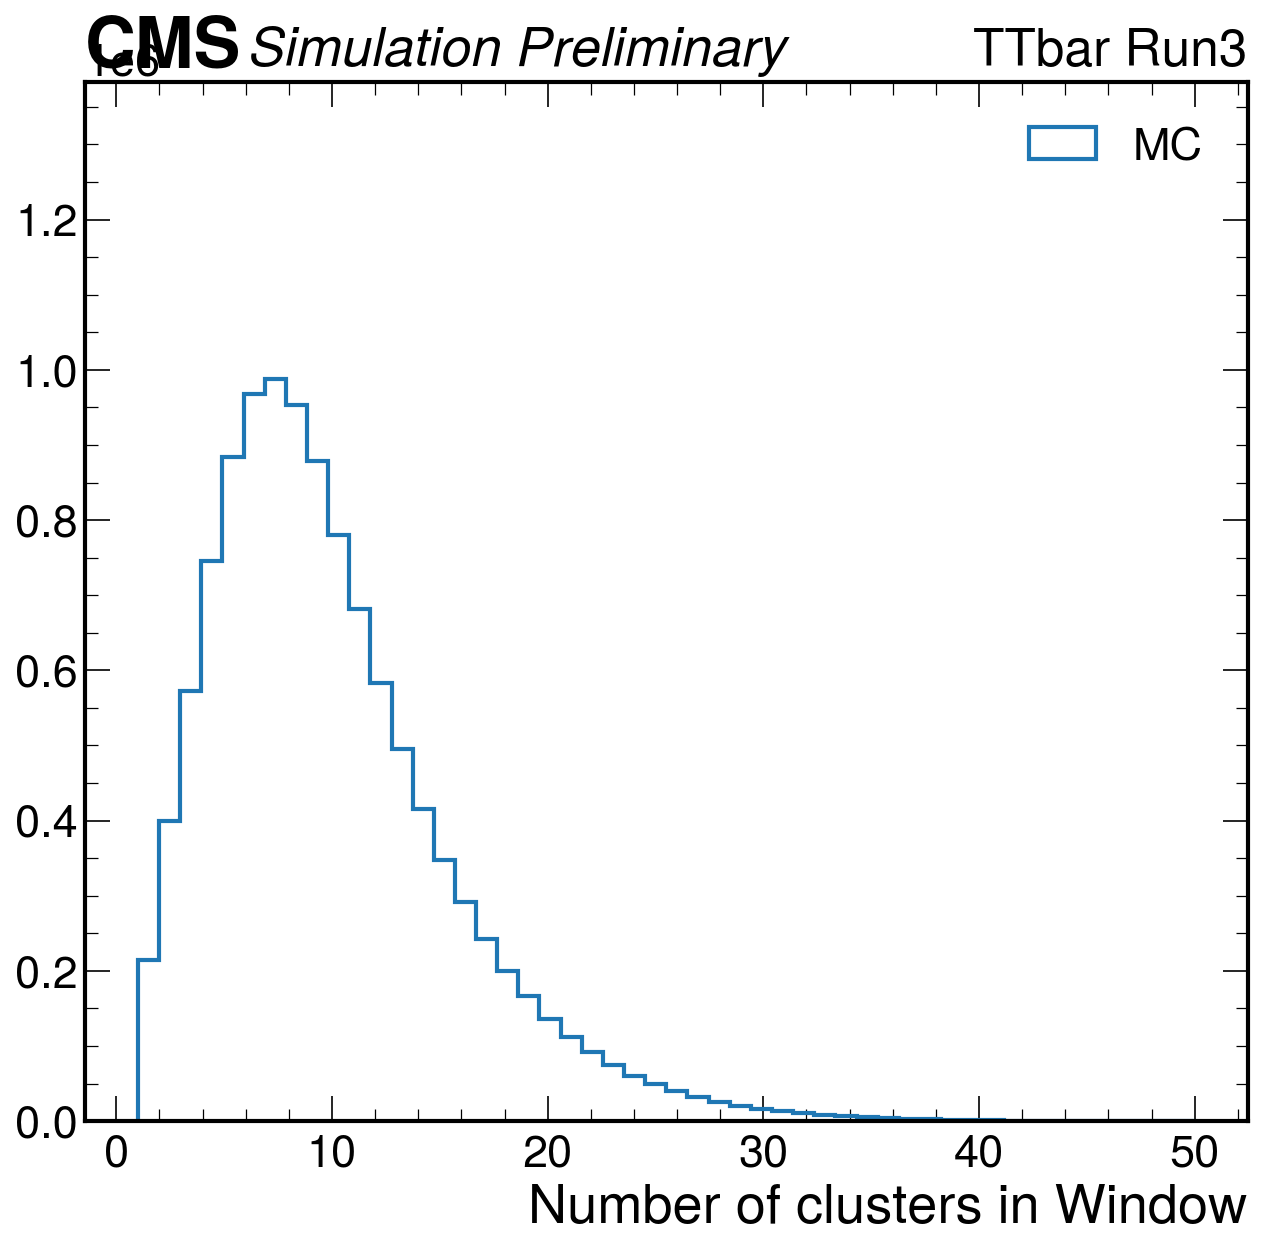

In [32]:
plot_hist(ak.flatten(ncls), 
                var=f"ncls_in_Window", label="Number of clusters in Window",
                output_folder=output_folder,
               legend="MC",
                bins=50, xrange=(1,50))

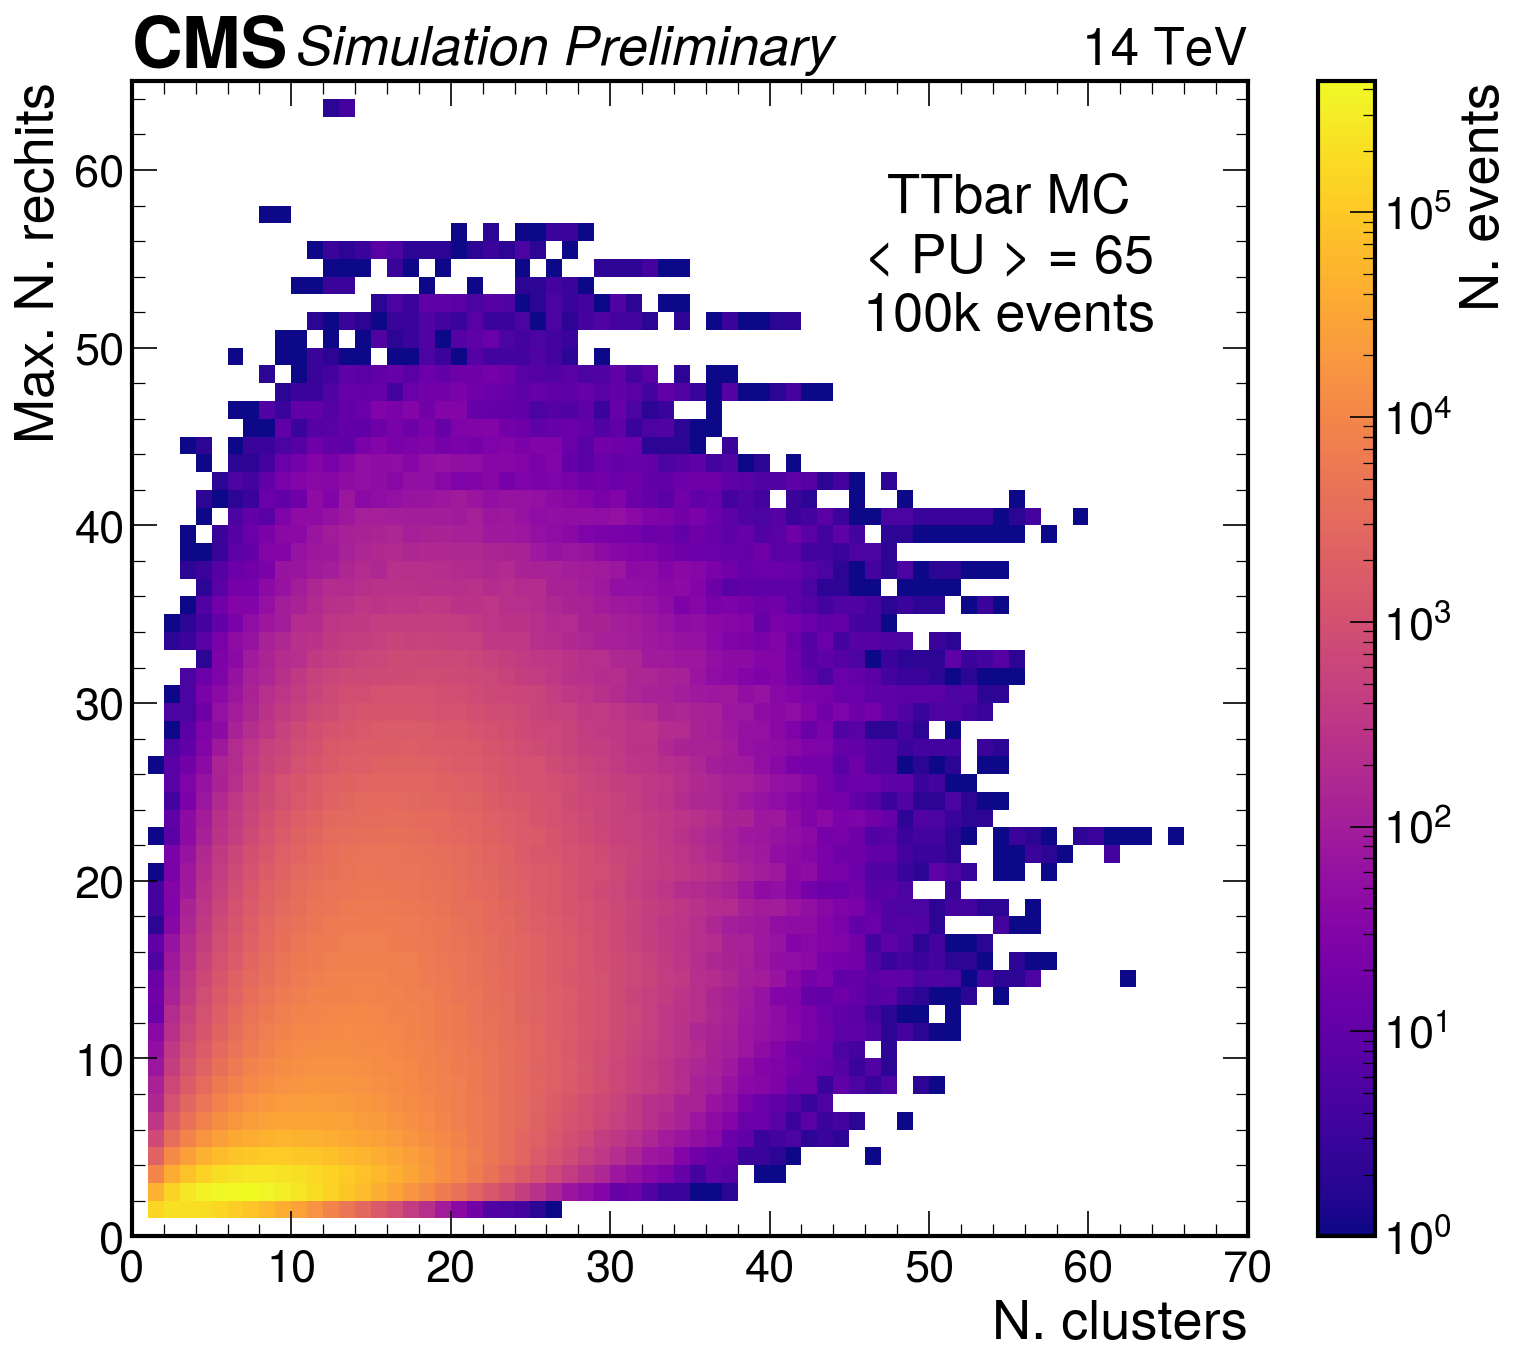

In [36]:
fig = plt.figure(figsize=(12,10), dpi=150)
ax = plt.gca()
counts,xbins,ybins,image = ax.hist2d(ak.to_numpy(ak.flatten(ncls)),
                                     ak.to_numpy(ak.flatten(max_rec)),
                                     norm=LogNorm(),
                                     cmap="plasma", bins=(70, 65), range=((0,70),(0,65)))

plt.colorbar(image, label="N. events")
ax.set_xlabel("N. clusters")
ax.set_ylabel("Max. N. rechits")
#ax.text(49,60, "N. Objects per window",  horizontalalignment="center")
ax.text(55, 51, "TTbar MC\n< PU > = 65\n100k events",  horizontalalignment="center")

hep.cms.label(llabel="Simulation Preliminary", rlabel="14 TeV", loc=0, ax=ax)
if output_folder!=None:
    var ="nclusters_nrechits_perwindow"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

/tmp/ipykernel_12741/2913545166.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  I = ax.contourf(np.arange(1, 71), np.arange(1,71), counts,  norm=LogNorm(),
/tmp/ipykernel_12741/2913545166.py:6: UserWarning: linewidths is ignored by contourf
  I = ax.contourf(np.arange(1, 71), np.arange(1,71), counts,  norm=LogNorm(),


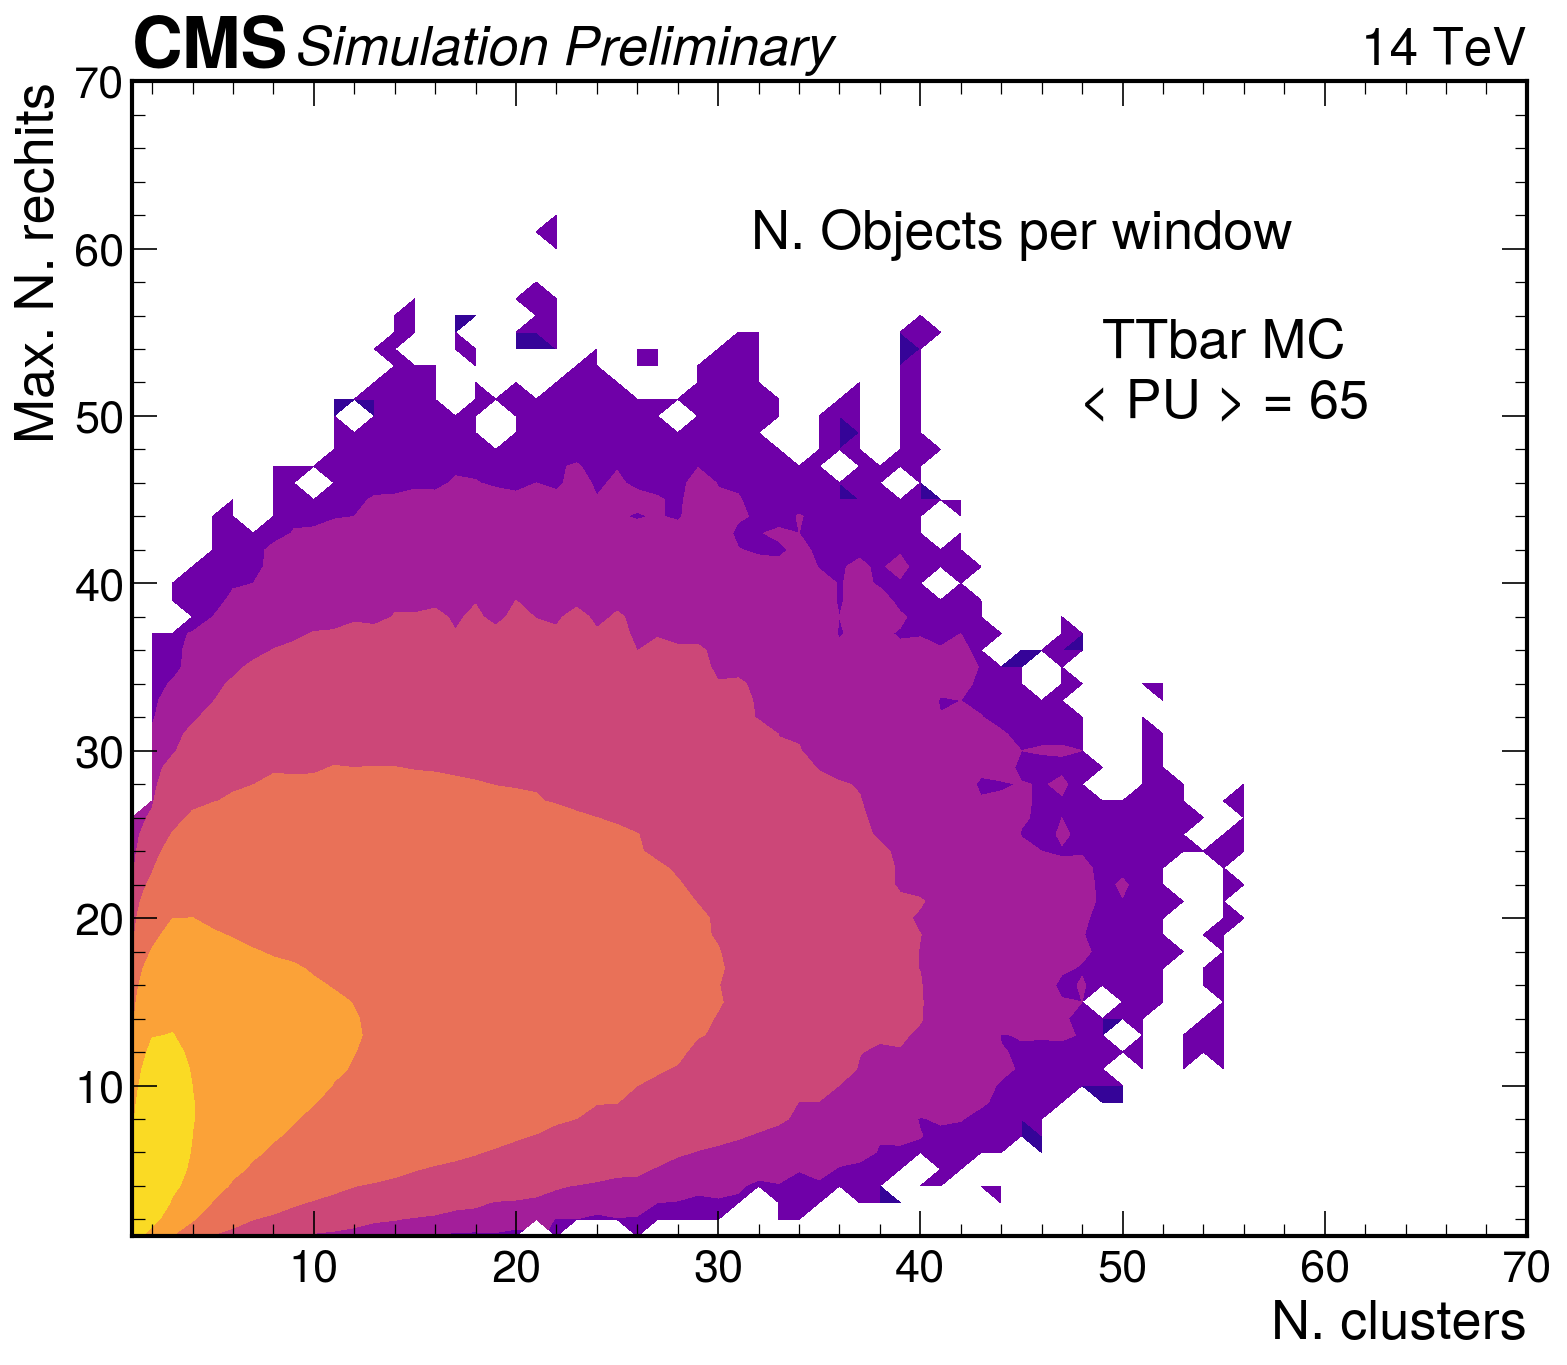

In [223]:
fig = plt.figure(figsize=(12,10), dpi=150)
ax = plt.gca()
counts, _,_ = np.histogram2d(ak.to_numpy(ak.flatten(ncls)),
                                     ak.to_numpy(ak.flatten(max_rec)),bins=(70, 70), range=((1,71),(1,71)) )

I = ax.contourf(np.arange(1, 71), np.arange(1,71), counts,  norm=LogNorm(),
             linestyles="dashed",
              cmap="plasma", linewidths=2)

plt.colorbar(image)
ax.set_xlabel("N. clusters")
ax.set_ylabel("Max. N. rechits")
ax.text(45,60, "N. Objects per window",  horizontalalignment="center")
ax.text(55, 50, "TTbar MC\n< PU > = 65",  horizontalalignment="center")

hep.cms.label(llabel="Simulation Preliminary", rlabel="14 TeV", loc=0, ax=ax)
if output_folder!=None:
    var ="nclusters_nrechits_perwindow"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

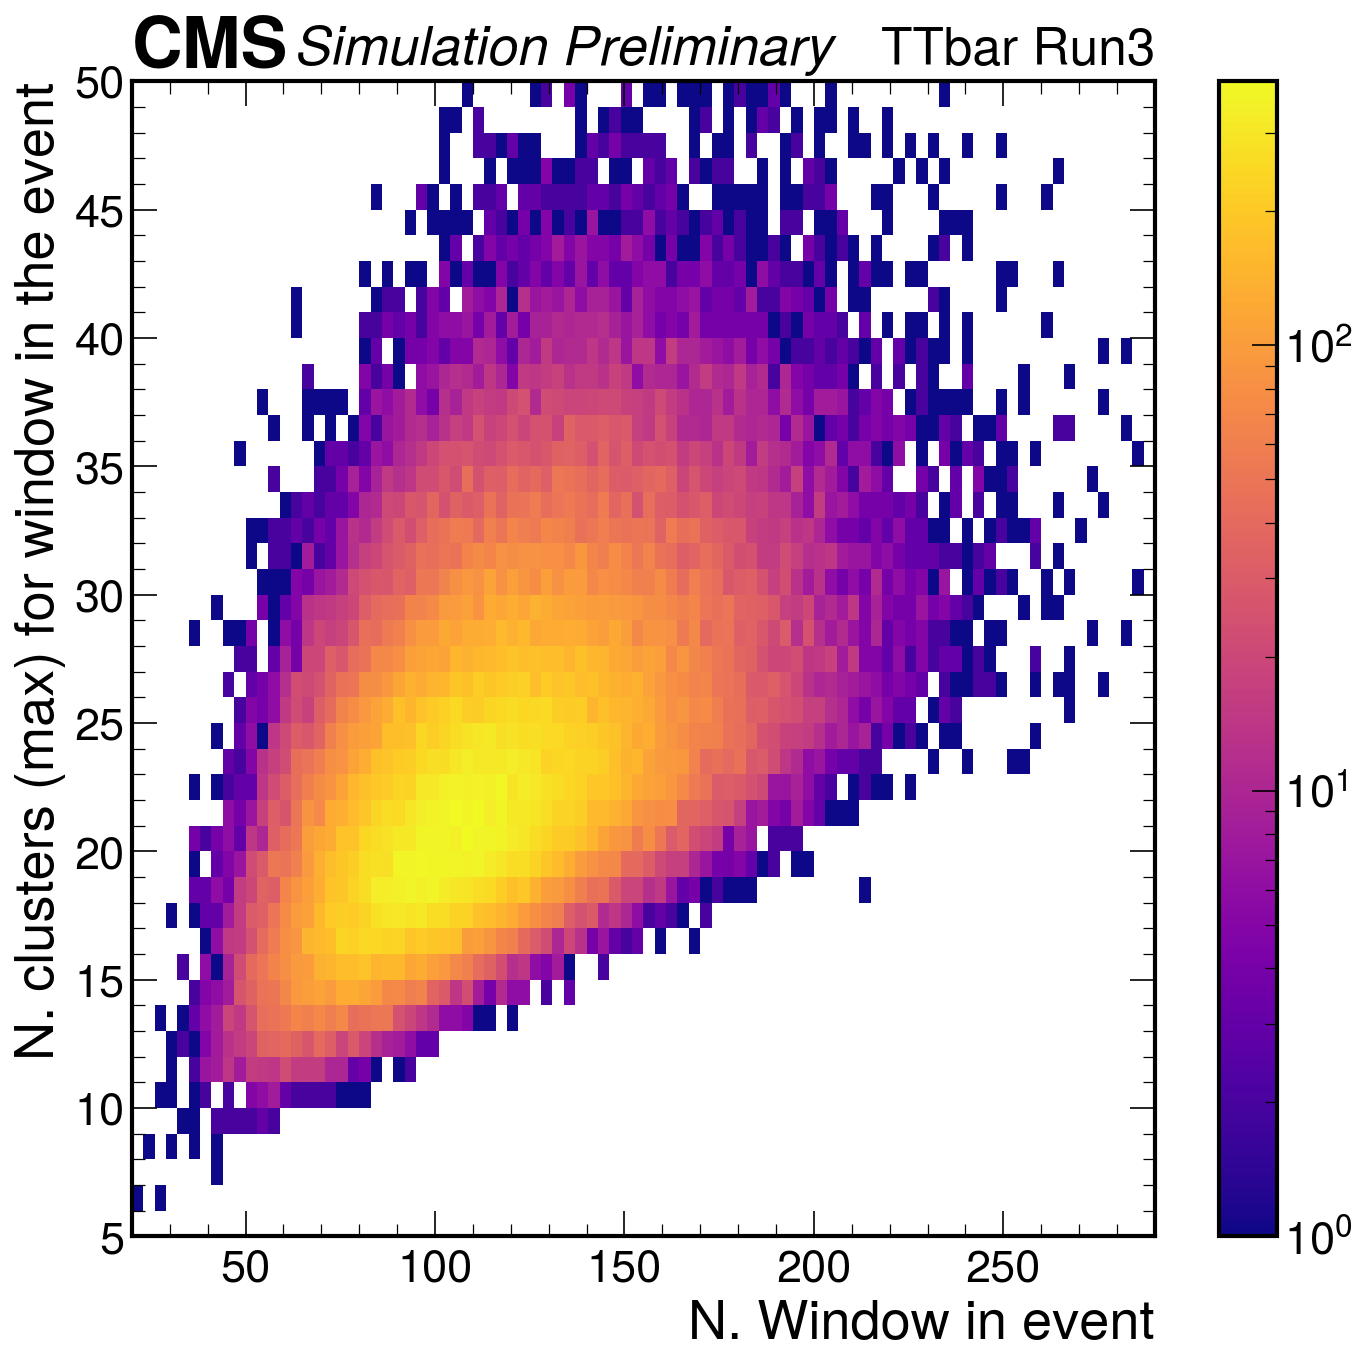

In [52]:
fig = plt.figure(figsize=(11,10), dpi=150)
ax = plt.gca()
counts,xbins,ybins,image = ax.hist2d(ak.to_numpy(nwind), 
                                     ak.to_numpy(max_ncls_ev),
                                     norm=LogNorm(),
                                      cmap="plasma", bins=(90, 45), range=((20,290),(5,50)))

plt.colorbar(image)
ax.set_xlabel("N. Window in event")
ax.set_ylabel("N. clusters (max) for window in the event")

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="nwind_nclsmax_perevent"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

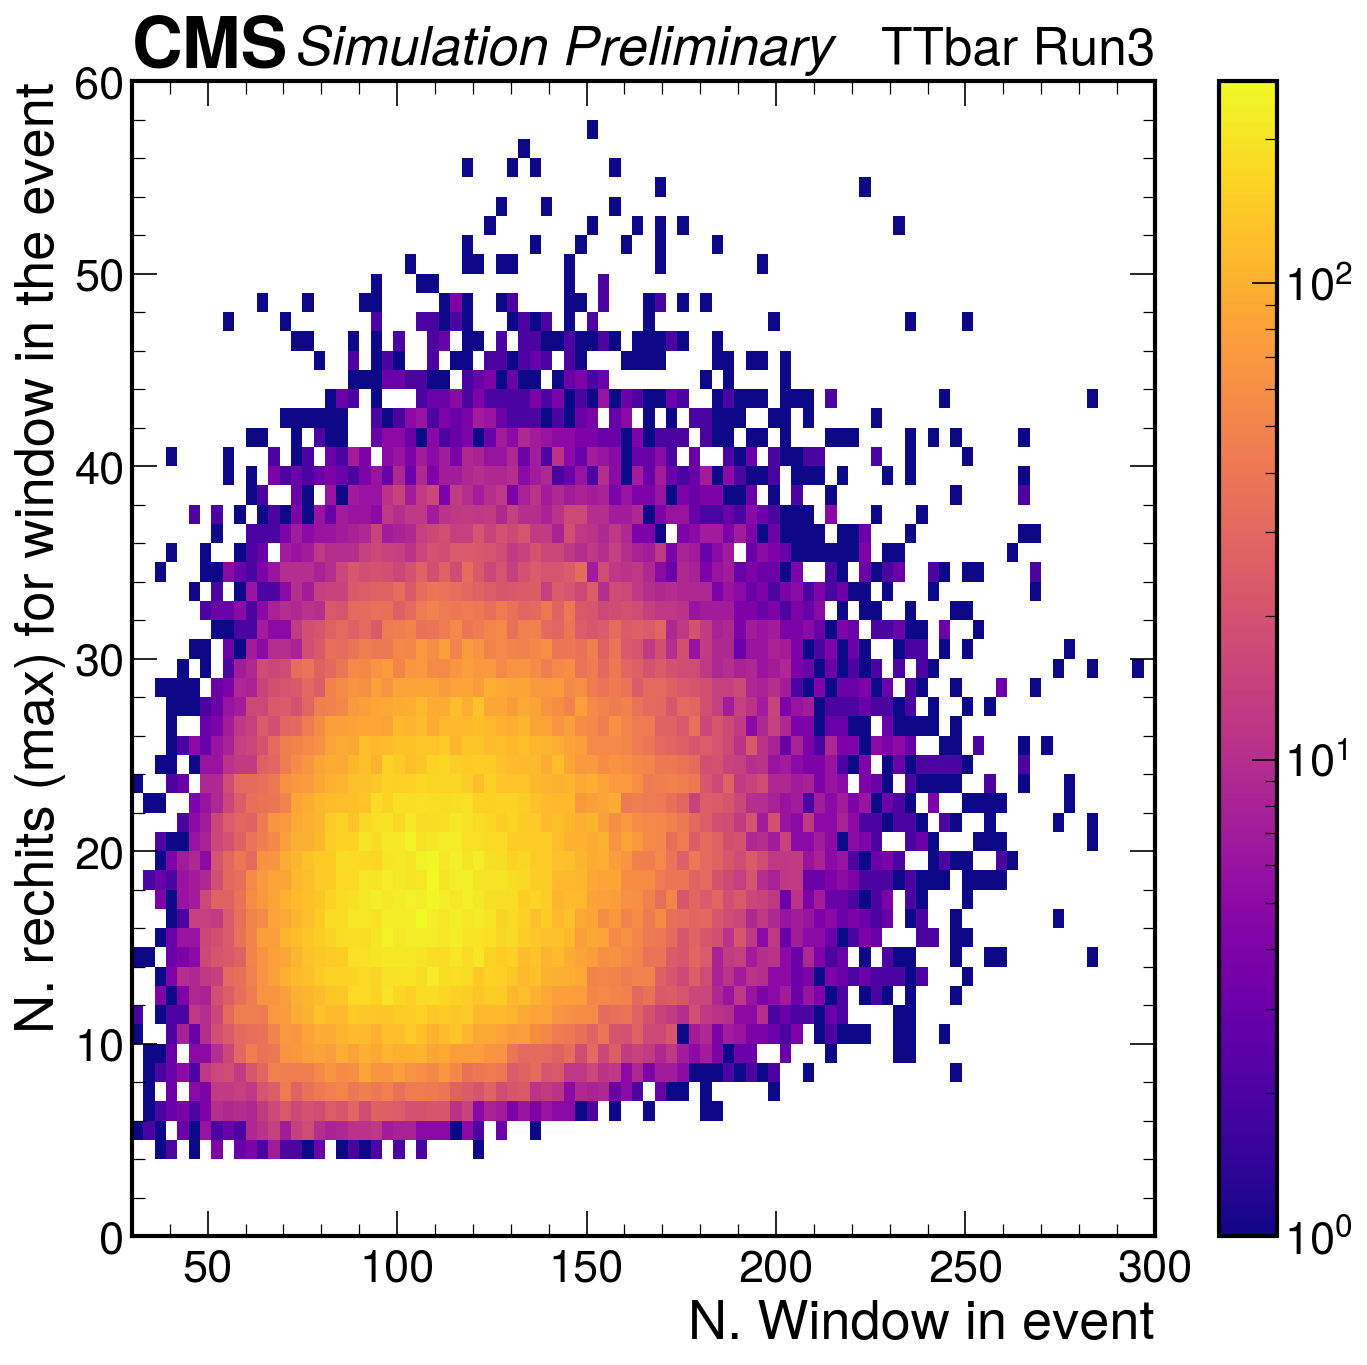

In [55]:
fig = plt.figure(figsize=(11,10), dpi=150)
ax = plt.gca()
counts,xbins,ybins,image = ax.hist2d(ak.to_numpy(nwind),
                                     ak.to_numpy(max_rec_ev),
                                     norm=LogNorm(),
                                      cmap="plasma", bins=(90, 60), range=((30,300),(0,60)))

plt.colorbar(image)
ax.set_xlabel("N. Window in event")
ax.set_ylabel("N. rechits (max) for window in the event")

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="nwind_nmaxrechit_perevent"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

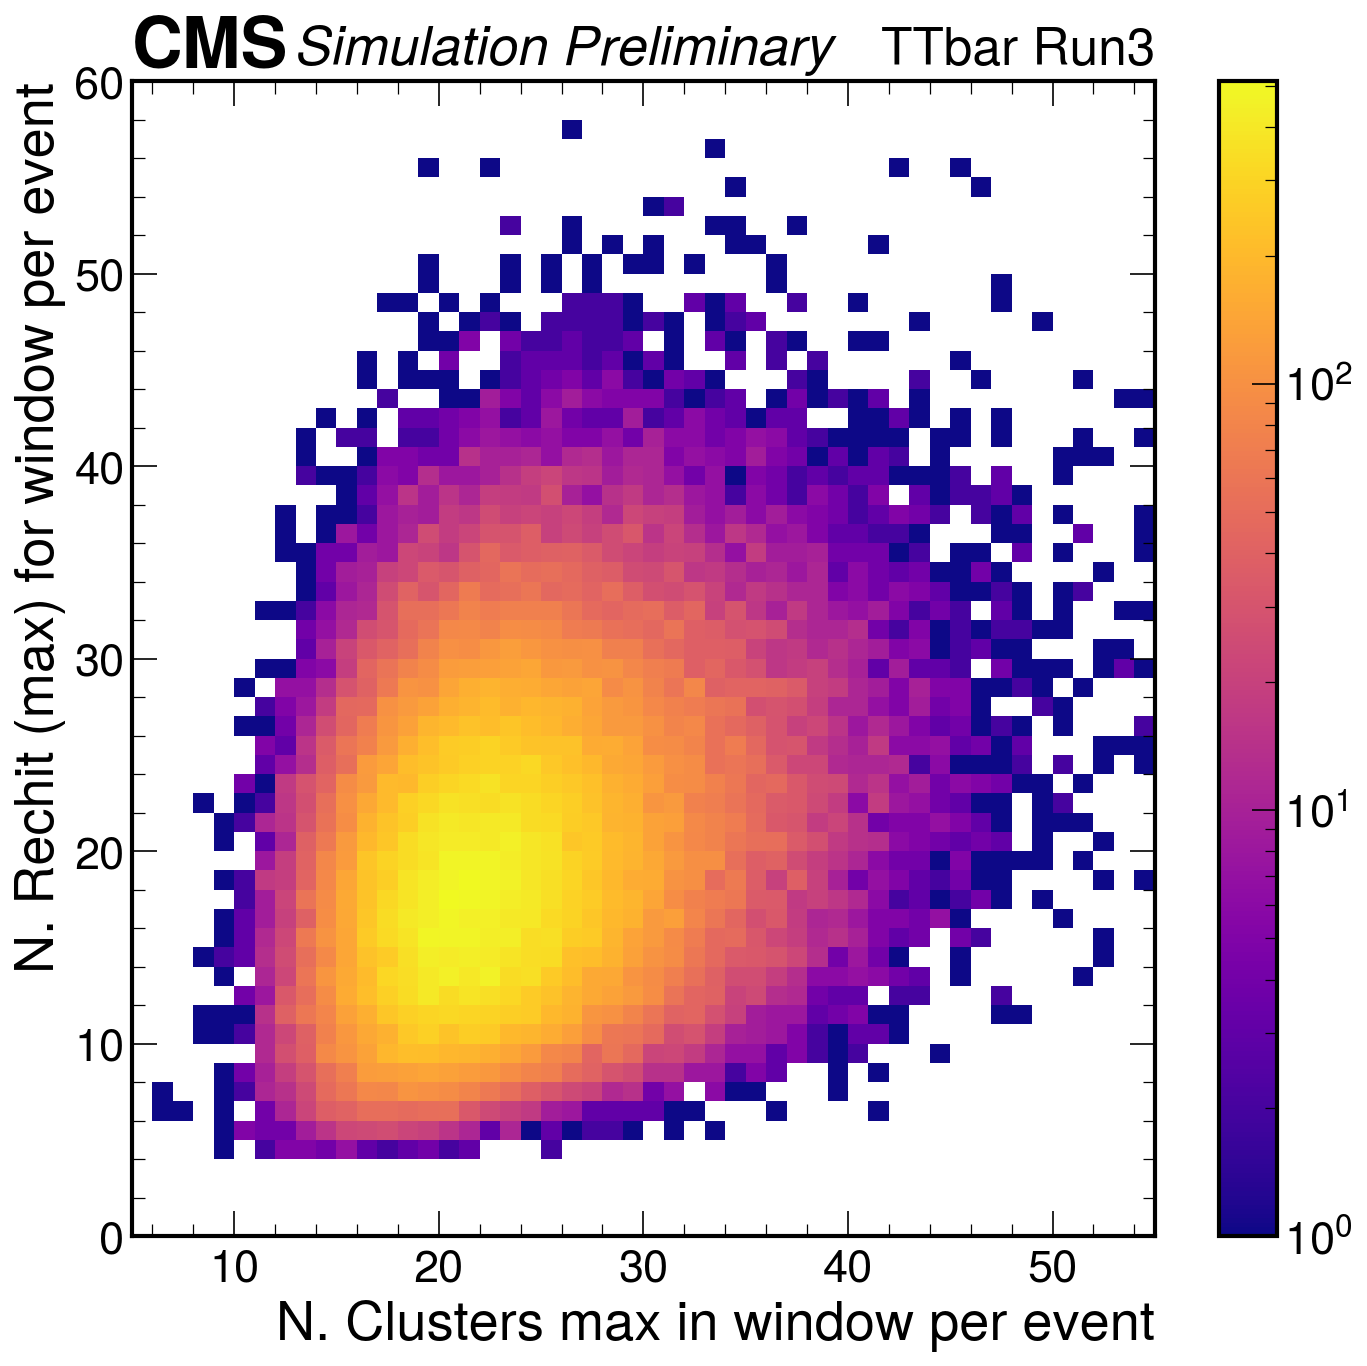

In [58]:
fig = plt.figure(figsize=(11,10), dpi=150)
ax = plt.gca()
counts,xbins,ybins,image = plt.hist2d(ak.to_numpy(max_ncls_ev),
                                      ak.to_numpy(max_rec_ev),
                                      norm=LogNorm(),
                                      cmap="plasma", bins=(50, 60), range=((5,55),(0,60)))

plt.colorbar(image)
ax.set_xlabel("N. Clusters max in window per event")
ax.set_ylabel("N. Rechit (max) for window per event")

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="ncls_nmaxrechit_perevent"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

### Analyze the cumulative distribution

In [19]:
count_rec, bins = np.histogram(ak.flatten(max_rec), bins=np.arange(0,60))
count_cls, bins = np.histogram(ak.flatten(ncls), bins=np.arange(0,60))
count_wind, bins = np.histogram(nwind, bins=np.arange(0,60))

In [20]:
def reverse_cumulative(c):
    return np.flip(np.cumsum(np.flip(c)))/ np.sum(c)

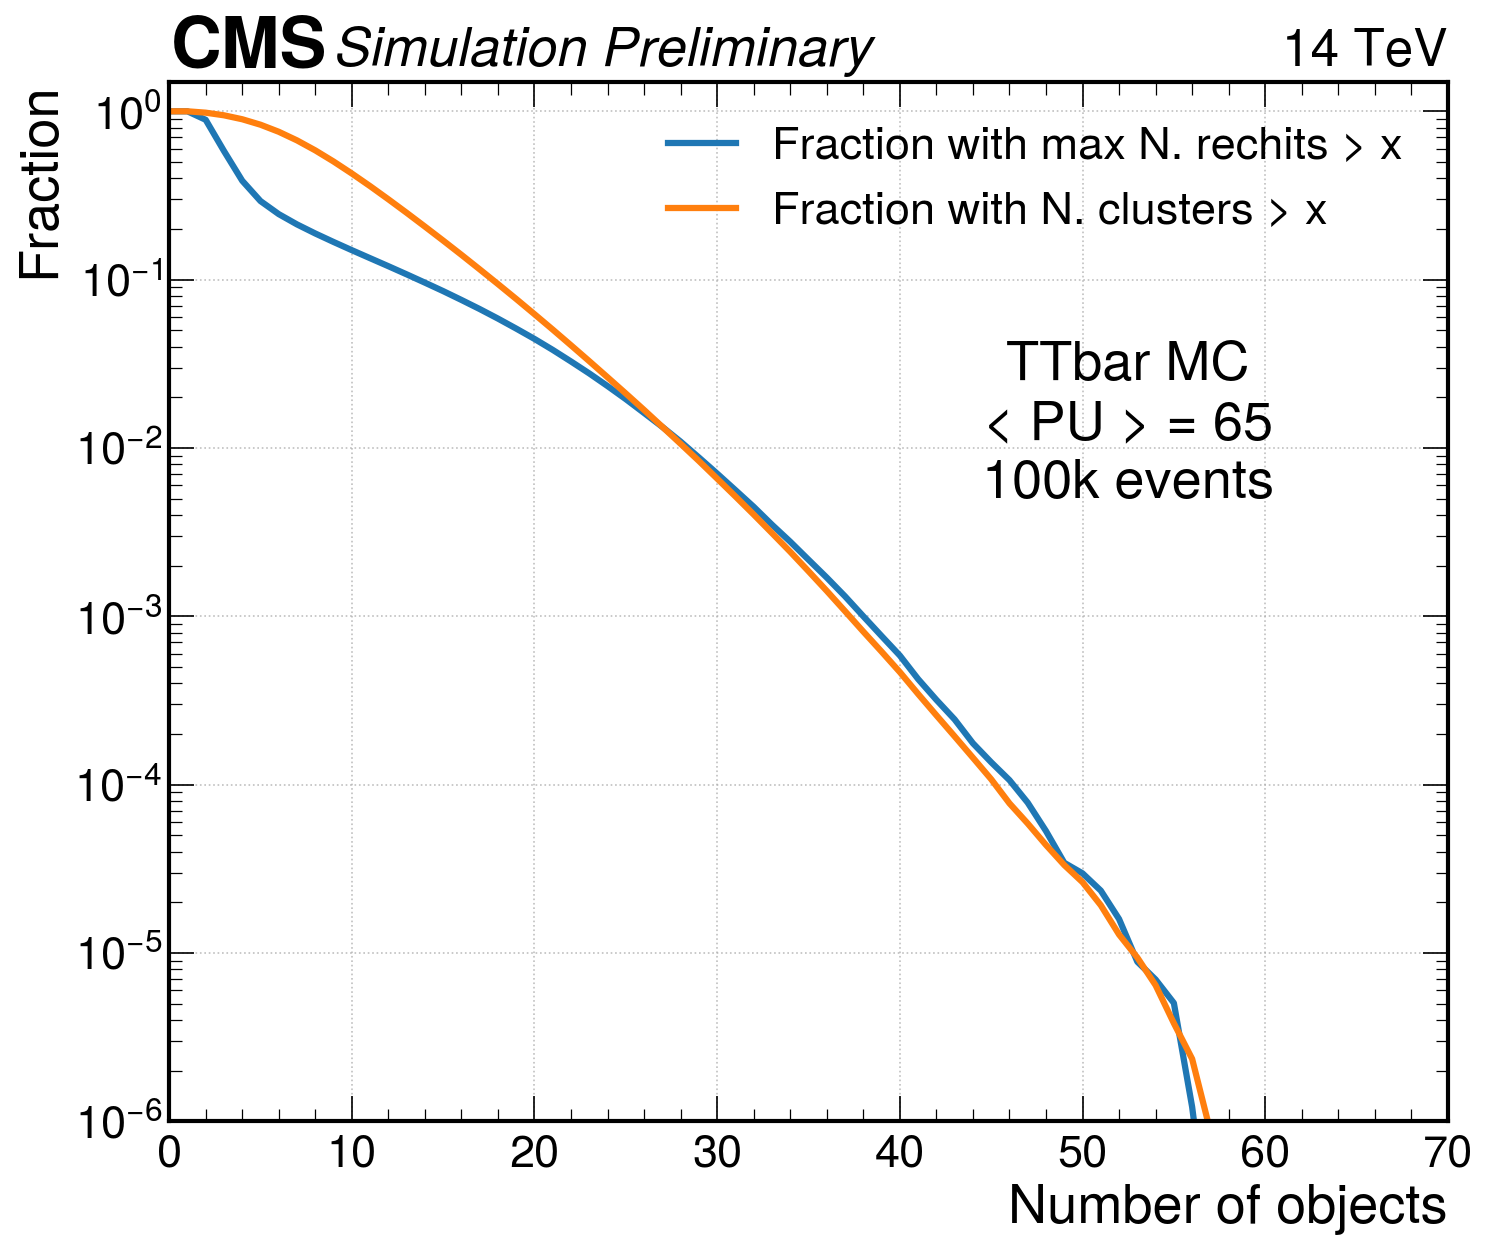

In [46]:
fig = plt.figure(figsize=(11,9), dpi=150)
ax = plt.gca()
ax.plot(reverse_cumulative(count_rec), linewidth=3, label="Fraction with max N. rechits > x")
ax.plot(reverse_cumulative(count_cls), linewidth=3, label="Fraction with N. clusters > x")
#ax.plot(reverse_cumulative(count_wind), linewidth=3, label="% events with N. windows > x", linestyle="dashed")
ax.set_yscale("log")
ax.set_xlabel("Number of objects")
ax.set_ylabel("Fraction")
ax.set_ylim(1e-6, 1.5)
ax.set_xlim(0, 70)
ax.grid()
ax.legend()

hep.cms.label(llabel="Simulation Preliminary", rlabel="14 TeV", loc=0, ax=ax)
ax.text(0.75, 0.6, "TTbar MC\n< PU > = 65\n100k events", transform=ax.transAxes, horizontalalignment="center")

if output_folder!=None:
    var ="cumulative_nrechit_ncls_perwindow"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

Now we compute the average fraction of windows that needs to the evaluated with the large model after 
the application of the N rechit and N clusters cuts

In [68]:
len(list(range(1,61,2)))

30

In [ ]:
fraction_small = np.zeros((60,60))
n_wind_toeval_small = np.zeros((60,60))
for irec in range(1, 61):
    mask_rec = max_rec<=irec
    dcut = data[mask_rec]
    for icl in range(1,61):
        print(irec,icl, end="| ")
        #nwind_clcut = ak.num(dcut[(ak.num(dcut, axis=2)<=icl)], axis=1)
        nwind_clcut = ak.sum(ak.num(dcut, axis=2)<=icl, axis=1)
        n_wind_toeval_small[icl-1, irec-1] = ak.mean(nwind_clcut)
        fraction_small[icl-1, irec-1] = ak.mean(nwind_clcut/nwind)

In [86]:
np.save( output_folder + "/efficiency_data.npz", fraction_small)

In [23]:
from matplotlib import ticker, cm

In [24]:
fraction_small = np.load(output_folder + "/efficiency_data.npz.npy")

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,10), dpi=150)

#I = ax.imshow(1- fraction_small.T,origin="lower", cmap="plasma", norm=LogNorm(vmax=1, vmin=1e-6),
              # aspect="auto")

#ax.set_xlim(0, 30)
ax.set_xticks(np.arange(0, 60,5))
ax.set_yticks(np.arange(0, 60,5))
ax.set_xticklabels(np.arange(0,60,5))
ax.set_yticklabels(np.arange(0,60,5))
ax.minorticks_off()

I = ax.contourf(np.arange(1, 61), np.arange(1,61), 1-fraction_small, norm=LogNorm(vmax=1, vmin=1e-7), 
             linestyles="dashed", #levels=[1e-7, 1e-6,1e-5,1e-4,1e-3,5e-3, 1e-2, 5e-2, 1e-1, 0.5, 0.75, 1],
           cmap="plasma", linewidths=2)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(b)

plt.colorbar(I, ax=ax, label="Average fraction", format=ticker.FuncFormatter(fmt))

ax.set_xlabel("N. Cluster")
ax.set_ylabel("Max N. Rechits")
ax.text(0.1, 0.15, "Average fraction \nwith $N_{clusters}> x$ or $N_{max rechits} > y$", 
       transform=ax.transAxes)

hep.cms.label(llabel="Simulation Preliminary", rlabel="14 TeV", loc=0, ax=ax)
ax.text(13,47, "TTbar MC\n< PU > = 65\n100k events", horizontalalignment="center")

ax.scatter(15, 20, s=600, c="red", marker=(5, 1))
ax.text(7, 23, "WP ($N_{cl}=15$, $N_{hits}=20$)", fontsize=14)

if output_folder!=None:
    var ="cumulative_perevent_window_efficiency"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

/tmp/ipykernel_30436/2112871939.py:13: UserWarning: linewidths is ignored by contourf
  I = ax.contourf(np.arange(1, 61), np.arange(1,61), 1-fraction_small, norm=LogNorm(vmax=1, vmin=1e-7),


/tmp/ipykernel_30436/453305969.py:13: UserWarning: linewidths is ignored by contourf
  I = ax.contourf(np.arange(1, 61), np.arange(1,61), 1-fraction_small, norm=LogNorm(vmax=1, vmin=1e-7),


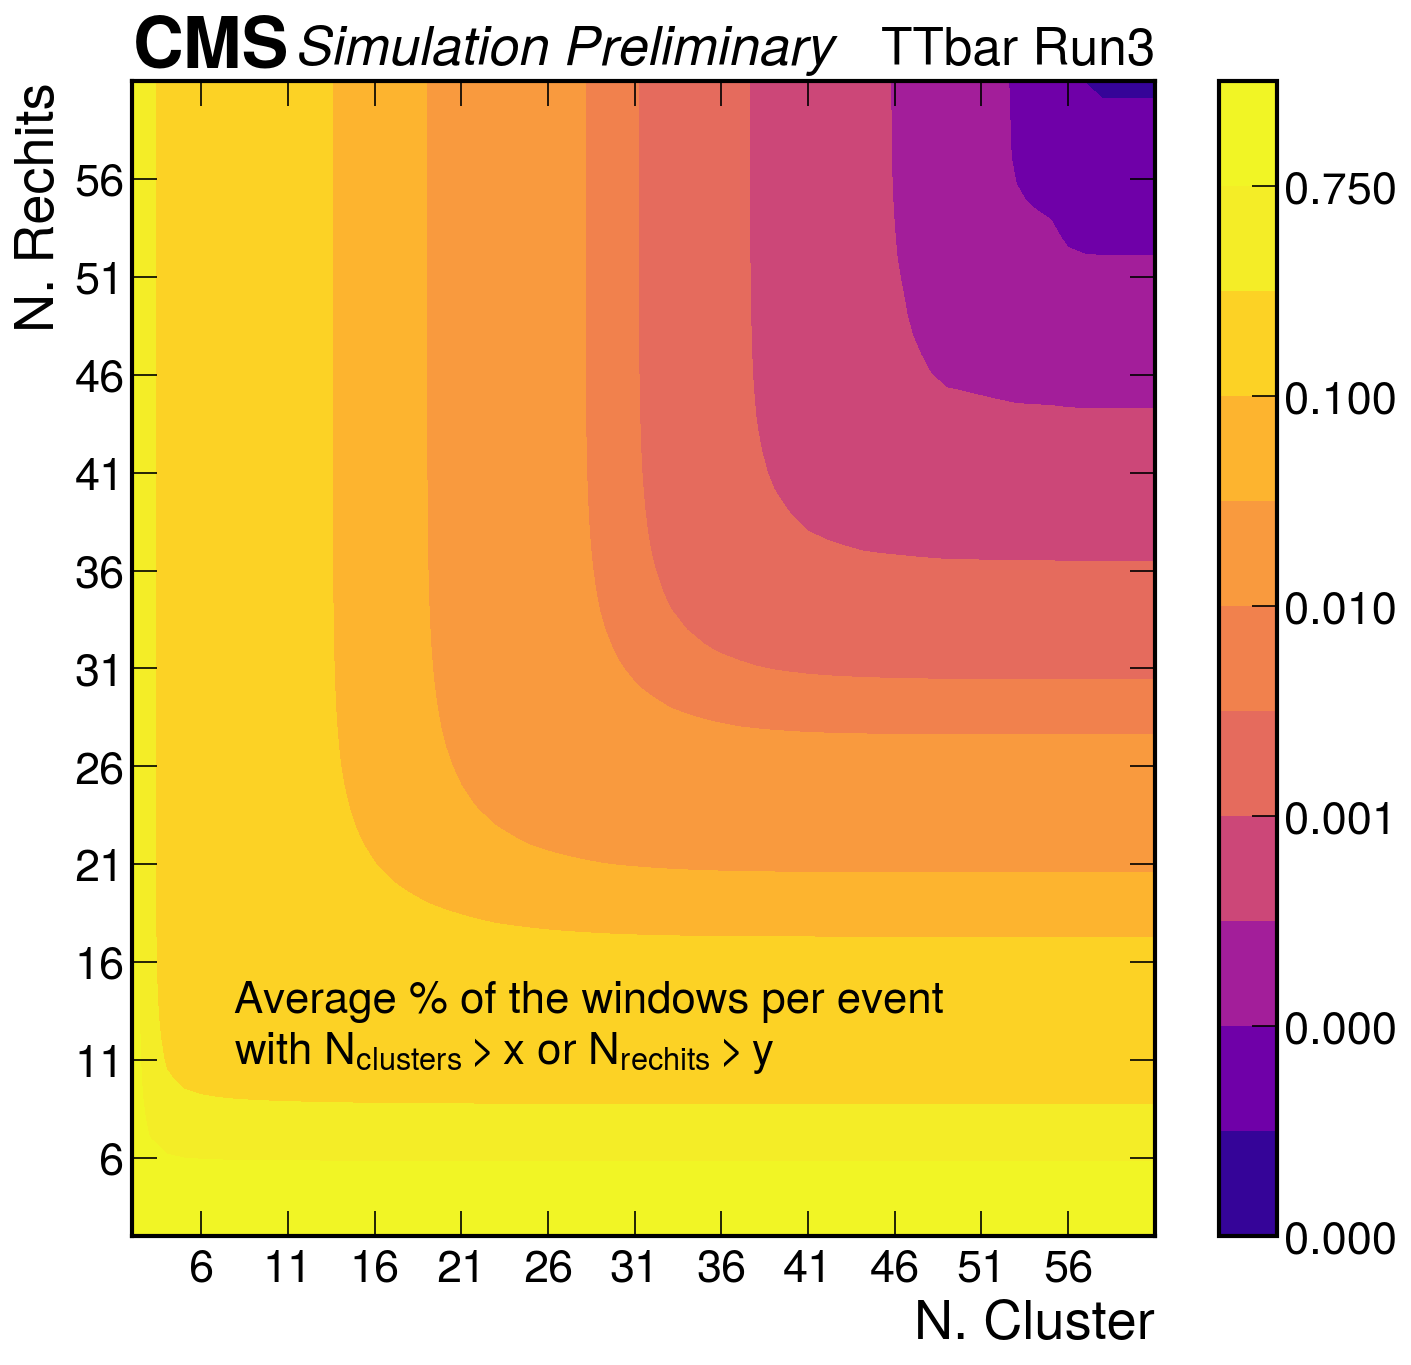

In [41]:
fig, ax = plt.subplots(1,1, figsize=(11,10), dpi=150)

#I = ax.imshow(1- fraction_small.T,origin="lower", cmap="plasma", norm=LogNorm(vmax=1, vmin=1e-6),
              # aspect="auto")

#ax.set_xlim(0, 30)
ax.set_xticks(np.arange(0, 60,5))
ax.set_yticks(np.arange(0, 60,5))
ax.set_xticklabels(np.arange(1,61,5))
ax.set_yticklabels(np.arange(1,61,5))
ax.minorticks_off()

I = ax.contourf(np.arange(1, 61), np.arange(1,61), 1-fraction_small, norm=LogNorm(vmax=1, vmin=1e-7), 
            levels=[1e-7, 1e-6,1e-5,1e-4,1e-3,5e-3, 1e-2, 5e-2, 1e-1, 0.5, 0.75, 1], linestyles="dashed",
           cmap="plasma", linewidths=2)
plt.colorbar(I, ax=ax)

ax.set_xlabel("N. Cluster")
ax.set_ylabel("N. Rechits")
ax.text(0.1, 0.15, "Average % of the windows per event\nwith $N_{clusters}> x$ or $N_{rechits} > y$", 
       transform=ax.transAxes, fontsize=21)

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="cumulative_perevent_window_efficiency"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")

In [ ]:
mask_rec = max_rec<=irec
    dcut = data[mask_rec]

<Array [107, 107, 89, 134, ... 107, 138, 150] type='100000 * int64'>

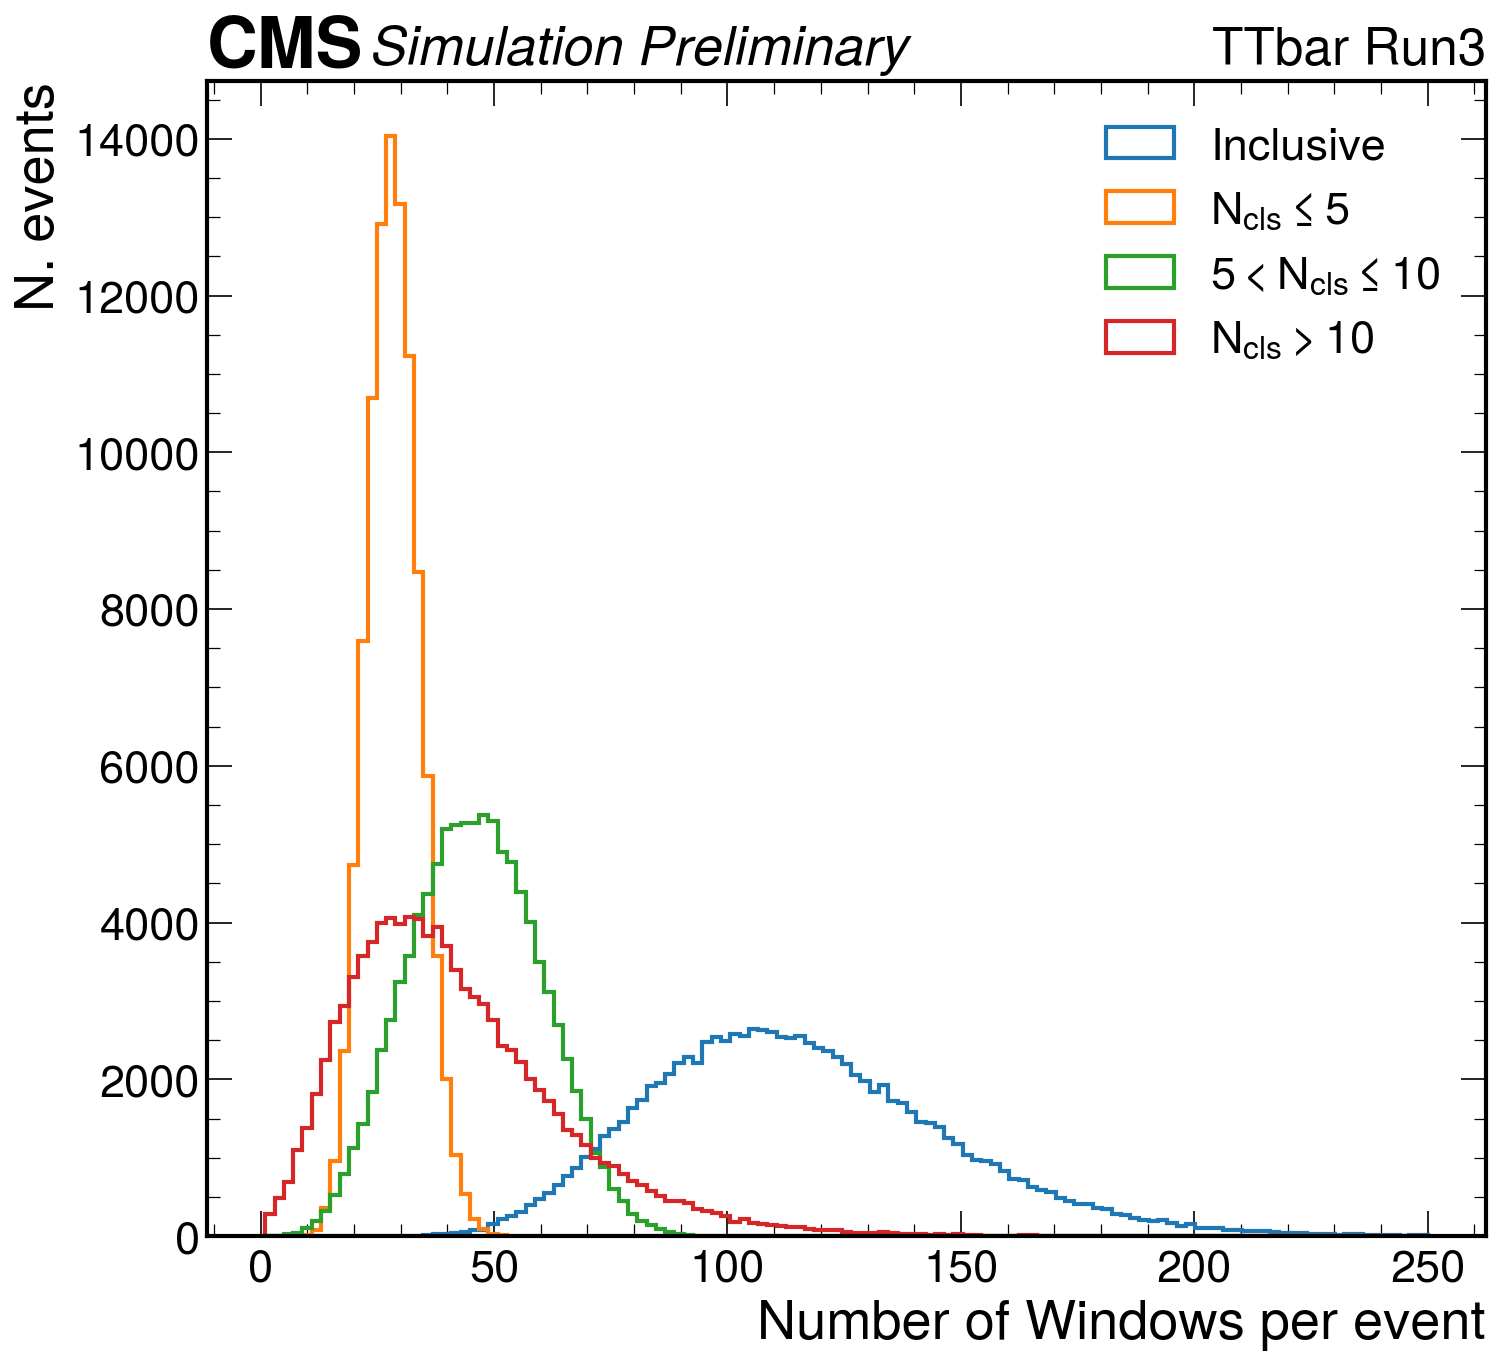

In [174]:
fig = plt.figure(figsize=(11,10), dpi=150)
ax = plt.gca()
ax.hist(nwind, bins=125, range=(1,250), histtype="step", linewidth=2, label="Inclusive")

nwind5 = ak.num(data[ak.num(data, axis=2)<=5], axis=1)
nwind10 = ak.num(data[(ak.num(data, axis=2)>5)&(ak.num(data, axis=2)<=10)], axis=1)
nwindinf = ak.num(data[(ak.num(data, axis=2)>10)], axis=1)

ax.hist(nwind5,bins=125, range=(1,250), histtype="step", linewidth=2, label="$N_{cls} \leq 5$")
ax.hist(nwind10,bins=125, range=(1,250), histtype="step", linewidth=2, label="$5 < N_{cls} \leq 10$")
ax.hist(nwindinf,bins=125, range=(1,250), histtype="step", linewidth=2, label="$N_{cls} > 10$")
ax.set_xlabel("Number of Windows per event")
ax.set_ylabel("N. events")
#ax.set_yscale("log")

ax.legend()

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="number_of_window_in_events_by_ncls"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")
    

In [183]:
ncls = ak.num(data, axis=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


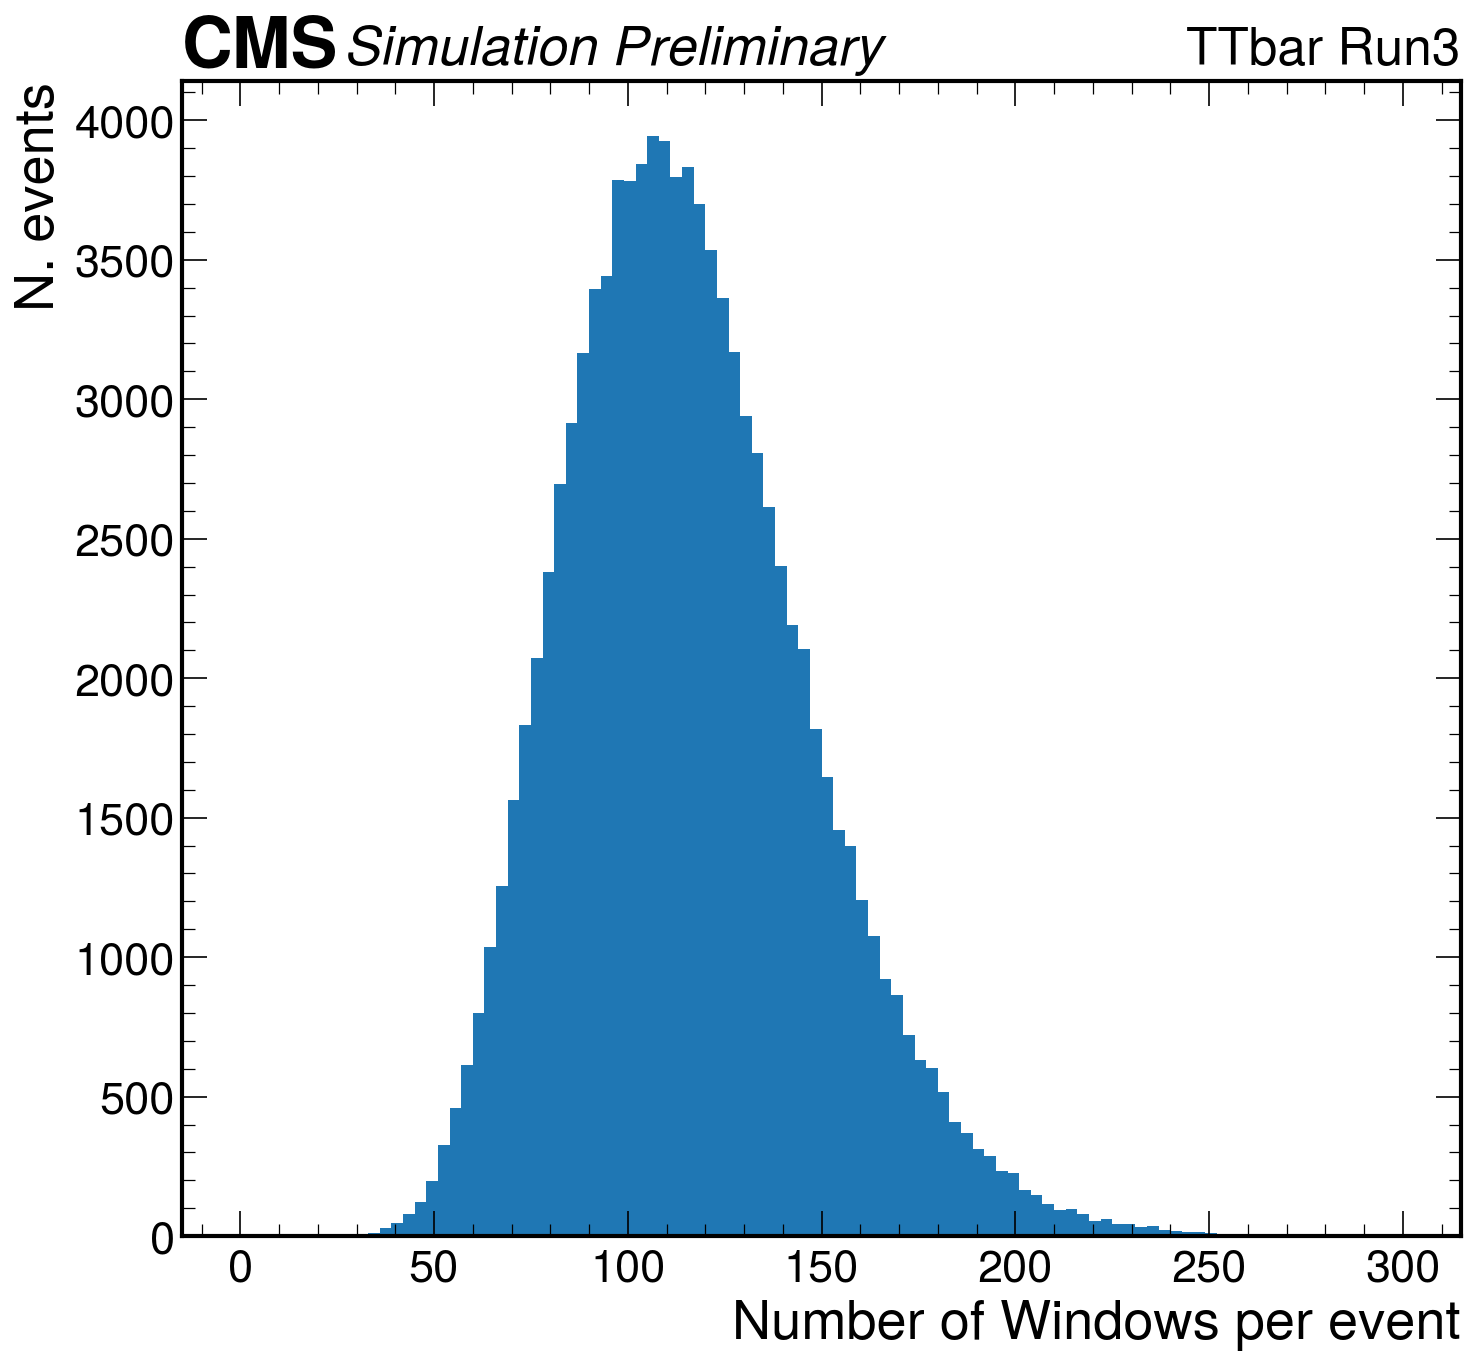

In [182]:
fig = plt.figure(figsize=(11,10), dpi=150)
ax = plt.gca()

ax.hist(nwind, bins=100, range=(0,300))




ax.set_xlabel("Number of Windows per event")
ax.set_ylabel("N. events")
#ax.set_yscale("log")

ax.legend()

hep.cms.label(llabel="Simulation Preliminary", rlabel="TTbar Run3", loc=0, ax=ax)
if output_folder!=None:
    var ="number_of_window_in_events_by_ncls"
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/{var}.png")
    fig.savefig(output_folder + f"/{var}.pdf")
    fig.savefig(output_folder + f"/{var}.svg")
    